# Librerias


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('dark_background')
import warnings
warnings.filterwarnings("ignore")

# ETL



> El primer paso fue extraer las tablas de la página https://indicadores.enacom.gob.ar/datos-abiertos.


> Luego se abre el archivo .xlsx y se van transformando a .csv cada pestaña útil del archivo.


No se convirtieron todas las tablas, porque varias tenían datos redundantes entre sí, a continuación se detalla cuáles de las 15 tablas se conservan y cuáles no:
+ `Acc_vel_loc_sinrango` se guarda por tener las localidades de forma más detallada. Y para disminuir las columnas se utilizan los siguientes rangos:
```
HASTA 512 kbps, + 512 Kbps - 1 Mbps, + 1 Mbps - 6 Mbps, + 6 Mbps - 10 Mbps, + 10 Mbps - 20 Mbps, + 20 Mbps - 30 Mbps, + 30 Mbps
```
+ `Velocidad_sin_rango` tiene la misma información que `Acceso por velocidad` pero menos organizado así que solo guarda el segundo.
+ `Velocidad % por prov` también se guarda.
+ `Totales VDM` no se utiliza por tener la misma información que las tablas anteriores pero menos detallada.
+ `Accesos_tecnologias_localidad` se guarda.
+ `Total Acceso Por Tecnologia` tiene los mismos datos que `Acceso Por Tecnologia` pero en este último están más desglosados así que se guarda solo este.
+ `Dial-BAf` tiene los mismos datos que `Totales Dial-BAf` pero más desglosados así que se conserva solo el primero.
+ Juntando `Penetracion-hogares` y `Penetracion-población` se consigue información más detallada que `Penetracion-totales`, por lo que se descarta esta última.
+ `Totales accesos velocidad` tiene la misma información que las primeras tablas así que se descarta.
+ Y la tabla `Ingresos` se guarda por tener información importante para el negocio.

> Finalmente con python se abren correctamente las tablas creando los data frames y se ponen a punto según el tipo de dato.

## Carga

### Acc_vel_loc_sinrango = velocidad_loc


In [2]:
velocidad_loc = pd.read_csv('/content/drive/MyDrive/Henry/velociadad_loc.csv', delimiter=';')

In [3]:
velocidad_loc['Provincia'] = velocidad_loc['Provincia'].str.title().str.strip()
velocidad_loc['Partido'] = velocidad_loc['Partido'].str.strip().str.title()
velocidad_loc['Localidad'] = velocidad_loc['Localidad'].str.strip().str.title()

In [4]:
velocidad_loc.head()

Provincia     Partido          Localidad Link Indec  Otros  0,256 Mbps  \
0  Buenos Aires  25 De Mayo         25 De Mayo    6854100    NaN         NaN   
1  Buenos Aires  25 De Mayo    Agustín Mosconi    6854010    NaN         NaN   
2  Buenos Aires  25 De Mayo          Del Valle    6854020    NaN         NaN   
3  Buenos Aires  25 De Mayo          Ernestina    6854030    NaN         NaN   
4  Buenos Aires  25 De Mayo  Gobernador Ugarte    6854040    NaN         NaN   

   0,5 Mbps  0,512 Mbps  0,75 Mbps  1 Mbps  ...  540 Mbps  600 Mbps  680 Mbps  \
0       2.0         NaN       19.0     NaN  ...       NaN       NaN       NaN   
1       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
2       1.0         NaN        NaN     NaN  ...       NaN       NaN       NaN   
3       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
4       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   

   700 Mbps  800 Mbps  850 Mbps  900 Mbps  999 Mbps  1000 Mbps  1024 Mbps  
0       NaN       NaN       NaN       NaN       NaN        NaN        NaN  
1       NaN       NaN       NaN       NaN       NaN        NaN        NaN  
2       NaN       NaN       NaN       NaN       NaN        NaN        NaN  
3       NaN       NaN       NaN       NaN       NaN        NaN        NaN  
4       NaN       NaN       NaN       NaN       NaN        NaN        NaN  

[5 rows x 136 columns]

In [5]:
ranges = {
    'HASTA 512 kbps': ['0,256 Mbps', '0,5 Mbps', '0,512 Mbps'],
    '+ 512 Kbps - 1 Mbps': ['1 Mbps','0,75 Mbps'],
    '+ 1 Mbps - 6 Mbps': ['1,5 Mbps', '2 Mbps','2,2 Mbps', '2,5 Mbps', '3 Mbps', '3,3 Mbps','3,5 Mbps','4 Mbps', '4,5 Mbps', '5 Mbps'],
    '+ 6 Mbps - 10 Mbps': ['6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps', '8 Mbps', '9 Mbps', '10 Mbps'],
    '+ 10 Mbps - 20 Mbps': ['10,1 Mbps', '10,2 Mbps', '11 Mbps', '12 Mbps', '12,3 Mbps', '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps'],
    '+ 20 Mbps - 30 Mbps': ['20 Mbps', '20,5 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps', '25 Mbps', '25,1 Mbps', '25,5 Mbps', '26 Mbps', '27 Mbps','30 Mbps'],
    '+ 30 Mbps': [ '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps', '36 Mbps', '38 Mbps','39 Mbps', '40 Mbps', '41 Mbps', '45 Mbps', '46 Mbps', '48 Mbps',
                  '49 Mbps', '50 Mbps', '50,1 Mbps', '50,25 Mbps', '51 Mbps', '55 Mbps','58 Mbps', '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps', '64 Mbps',
                   '65 Mbps', '66 Mbps', '70 Mbps', '75 Mbps', '78 Mbps', '80 Mbps','83 Mbps', '85 Mbps', '90 Mbps', '92 Mbps', '95 Mbps', '98 Mbps',
                   '100 Mbps', '100,1 Mbps', '100,25 Mbps', '105 Mbps', '110 Mbps', '120 Mbps', '122 Mbps', '125 Mbps', '126 Mbps', '130 Mbps', '140 Mbps',
                   '150 Mbps', '155 Mbps', '158 Mbps', '160 Mbps', '164 Mbps', '165 Mbps','180 Mbps', '200 Mbps', '205 Mbps', '212 Mbps', '220 Mbps', '225 Mbps',
                   '240 Mbps', '246 Mbps', '250 Mbps', '256 Mbps', '275 Mbps', '300 Mbps','320 Mbps', '325 Mbps', '330 Mbps', '340 Mbps', '350 Mbps',
                    '400 Mbps', '450 Mbps', '480 Mbps', '500 Mbps', '512 Mbps', '520 Mbps', '540 Mbps', '600 Mbps', '680 Mbps', '700 Mbps', '800 Mbps',
                   '850 Mbps','900 Mbps', '999 Mbps', '1024 Mbps', '1000 Mbps']
}

for new_col, old_cols in ranges.items():
    velocidad_loc[new_col] = velocidad_loc[old_cols].sum(axis=1)

velocidad_loc = velocidad_loc.drop(columns=[col for cols in ranges.values() for col in cols])


In [6]:
velocidad_loc.columns

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros',
       'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
       '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps',
       '+ 30 Mbps'],
      dtype='object')

In [7]:
velocidad_loc.dtypes

Provincia               object
Partido                 object
Localidad               object
Link Indec              object
Otros                  float64
HASTA 512 kbps         float64
+ 512 Kbps - 1 Mbps    float64
+ 1 Mbps - 6 Mbps      float64
+ 6 Mbps - 10 Mbps     float64
+ 10 Mbps - 20 Mbps    float64
+ 20 Mbps - 30 Mbps    float64
+ 30 Mbps              float64
dtype: object

In [8]:
velocidad_loc['Provincia'] = velocidad_loc['Provincia'].str.title()

In [9]:
velocidad_loc.head()

Provincia     Partido          Localidad Link Indec  Otros  \
0  Buenos Aires  25 De Mayo         25 De Mayo    6854100    NaN   
1  Buenos Aires  25 De Mayo    Agustín Mosconi    6854010    NaN   
2  Buenos Aires  25 De Mayo          Del Valle    6854020    NaN   
3  Buenos Aires  25 De Mayo          Ernestina    6854030    NaN   
4  Buenos Aires  25 De Mayo  Gobernador Ugarte    6854040    NaN   

   HASTA 512 kbps  + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  \
0             2.0                 19.0              230.0               663.0   
1             0.0                  0.0                0.0                59.0   
2             1.0                  0.0              181.0                10.0   
3             0.0                  0.0               75.0                 0.0   
4             0.0                  0.0              172.0                 8.0   

   + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  + 30 Mbps  
0                415.0               3443.0     1474.0  
1                  0.0                  5.0        0.0  
2                  0.0                  0.0        0.0  
3                  0.0                  0.0        0.0  
4                  0.0                  0.0        1.0

### Acceso por velocidad = velocidad_fechas




In [10]:
velocidad_fechas = pd.read_csv('/content/drive/MyDrive/Henry/velocidad_fechas.csv', delimiter=';', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [11]:
velocidad_fechas['Provincia'] = velocidad_fechas['Provincia'].str.strip()

In [12]:
velocidad_fechas.head()

Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          4     Buenos Aires          26.909               23.962   
1  2024          4  Capital Federal         516.000                4.544   
2  2024          4        Catamarca          71.000              209.000   
3  2024          4            Chaco         236.000              477.000   
4  2024          4           Chubut         111.000                1.088   

  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           228.393             239.339              246.144   
1            26.409              48.083               33.925   
2             3.065               3.734                4.423   
3            14.811              10.361                6.247   
4            44.276              31.402               22.843   

   + 20 Mbps - 30 Mbps  + 30 Mbps   OTROS      Total  
0              110.876  4.042.646  93.351  5.011.620  
1                5.829  1.355.061   0.000  1.474.367  
2                1.827     61.181  77.000     74.587  
3                5.729    105.485   4.040    147.386  
4               20.196     33.665  16.589    170.170

In [13]:
velocidad_fechas[(velocidad_fechas['Provincia']=='Chaco')&(velocidad_fechas['Trimestre']==4)] # Estan mal cargado el cuarto trimestre del 2023 asi que se reemplaza el valor

Año  Trimestre Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
3    2024          4     Chaco           236.0              477.000   
99   2022          4     Chaco           461.0              771.000   
195  2021          4     Chaco           461.0              112.000   
291  2020          4     Chaco           301.0              112.000   
387  2019          4     Chaco            83.0                0.000   
483  2018          4     Chaco            69.0                3.405   
579  2017          4     Chaco            70.0                3.432   
675  2016          4     Chaco           191.0                3.983   
771  2015          4     Chaco           194.0                9.593   
867  2014          4     Chaco           483.0               12.837   

    + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
3              14.811              10.361                6.247   
99             16.067              17.846                6.704   
195            18.845              22.678               21.937   
291            24.782              22.479               26.802   
387            25.899              18.959               30.902   
483            36.437              25.633               18.965   
579            37.144              24.088               20.123   
675            45.634              21.323               14.887   
771            46.771              18.608               10.092   
867            42.106               7.908                2.600   

     + 20 Mbps - 30 Mbps + 30 Mbps  OTROS    Total  
3                  5.729   105.485  4.040  147.386  
99                 3.039    94.866  3.909  143.663  
195               13.692    58.435  7.585  143.745  
291               15.701    40.949  7.965  139.091  
387               13.516    21.556  6.988  117.903  
483               12.393     6.368  0.000  103.270  
579                7.290     3.289  1.035   96.471  
675                2.586       250  0.000   88.854  
771                1.136       159  0.000   86.553  
867              124.000         2  0.000   66.060

In [14]:
velocidad_fechas.loc[(velocidad_fechas['Trimestre'] == 4) & (velocidad_fechas['Año'] == 2024), 'Año'] = 2023

In [15]:
velocidad_fechas.dtypes

Año                      int64
Trimestre                int64
Provincia               object
HASTA 512 kbps         float64
+ 512 Kbps - 1 Mbps    float64
+ 1 Mbps - 6 Mbps       object
+ 6 Mbps - 10 Mbps     float64
+ 10 Mbps - 20 Mbps    float64
+ 20 Mbps - 30 Mbps    float64
+ 30 Mbps               object
OTROS                  float64
Total                   object
dtype: object

In [16]:
velocidad_fechas['OTROS'] = velocidad_fechas['OTROS'].replace(np.nan, '0')
columns = [
    'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
    '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps',
    '+ 30 Mbps', 'Total', 'OTROS']

for col in columns :
    velocidad_fechas[col] = velocidad_fechas[col].astype(str).str.replace('.', '').str.strip().astype(int)


In [17]:
velocidad_fechas.head()

Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2023          4     Buenos Aires           26909                23962   
1  2023          4  Capital Federal            5160                 4544   
2  2023          4        Catamarca             710                 2090   
3  2023          4            Chaco            2360                 4770   
4  2023          4           Chubut            1110                 1088   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0             228393              239339               246144   
1              26409               48083                33925   
2               3065                3734                 4423   
3              14811               10361                 6247   
4              44276               31402                22843   

   + 20 Mbps - 30 Mbps  + 30 Mbps  OTROS    Total  
0               110876    4042646  93351  5011620  
1                 5829    1355061      0  1474367  
2                 1827      61181    770    74587  
3                 5729     105485    404   147386  
4                20196      33665  16589   170170

### Velocidad % por prov = velocidad_promedio








In [18]:
velocidad_promedio = pd.read_csv('/content/drive/MyDrive/Henry/velocidad_promedio.csv', delimiter=';')

In [19]:
velocidad_promedio['Provincia'] = velocidad_promedio['Provincia'].str.strip()

In [20]:
velocidad_promedio.head()

Año  Trimestre        Provincia Mbps (Media de bajada)
0  2023          4     Buenos Aires                 158,49
1  2023          4  Capital Federal                 234,44
2  2023          4        Catamarca                  89,40
3  2023          4            Chaco                 107,14
4  2023          4           Chubut                  20,29

In [21]:
velocidad_promedio.dtypes

Año                        int64
Trimestre                  int64
Provincia                 object
Mbps (Media de bajada)    object
dtype: object

In [22]:
velocidad_promedio['Mbps (Media de bajada)'] = velocidad_promedio['Mbps (Media de bajada)'].str.replace(',', '.').str.strip().astype(float)

In [23]:
velocidad_promedio.dtypes

Año                         int64
Trimestre                   int64
Provincia                  object
Mbps (Media de bajada)    float64
dtype: object

In [24]:
velocidad_promedio.head()

Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2023          4     Buenos Aires                  158.49
1  2023          4  Capital Federal                  234.44
2  2023          4        Catamarca                   89.40
3  2023          4            Chaco                  107.14
4  2023          4           Chubut                   20.29

### Accesos_tecnologias_localidad = acceso_localidad

In [25]:
acceso_localidad = pd.read_csv('/content/drive/MyDrive/Henry/acceso_localidad.csv', delimiter=';', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [26]:
acceso_localidad['Provincia'] = acceso_localidad['Provincia'].str.title().str.strip()
acceso_localidad['Partido'] = acceso_localidad['Partido'].str.strip().str.title()
acceso_localidad['Localidad'] = acceso_localidad['Localidad'].str.strip().str.title()

In [27]:
acceso_localidad.head()

Provincia     Partido               Localidad Link Indec  ADSL   \
0  Buenos Aires  25 De Mayo              25 De Mayo    6854100   756    
1  Buenos Aires  25 De Mayo               Del Valle    6854020   181    
2  Buenos Aires  25 De Mayo       Gobernador Ugarte    6854040   -      
3  Buenos Aires  25 De Mayo  Norberto De La Riestra    6854060   -      
4  Buenos Aires  25 De Mayo        Lucas Monteverde    6854050   -      

   CABLEMODEM   DIAL UP   FIBRA OPTICA   OTROS   SATELITAL   WIMAX   \
0       4.600       -                3     -           742     -      
1         -         -              -        10           1     -      
2         -         -              -       -           -       -      
3         782       -              496      16         -       -      
4         -         -              -       -           -       -      

   WIRELESS   Total general   
0       726           6.827   
1       -               192   
2       181             181   
3       185           1.479   
4         6               6

In [28]:
acceso_localidad.dtypes

Provincia          object
Partido            object
Localidad          object
Link Indec         object
 ADSL              object
 CABLEMODEM        object
 DIAL UP           object
 FIBRA OPTICA      object
 OTROS             object
 SATELITAL         object
 WIMAX             object
 WIRELESS          object
 Total general     object
dtype: object

In [29]:
acceso_localidad.columns

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', ' ADSL ',
       ' CABLEMODEM ', ' DIAL UP ', ' FIBRA OPTICA ', ' OTROS ', ' SATELITAL ',
       ' WIMAX ', ' WIRELESS ', ' Total general '],
      dtype='object')

In [30]:
columns = [' ADSL ', ' CABLEMODEM ', ' DIAL UP ', ' FIBRA OPTICA ', ' OTROS ', ' SATELITAL ', ' WIMAX ', ' WIRELESS ', ' Total general ']

for col in columns :
    acceso_localidad[col] = acceso_localidad[col].str.replace('.', '').str.replace('-', '0').str.strip().astype(int)

In [31]:
acceso_localidad.head()

Provincia     Partido               Localidad Link Indec   ADSL   \
0  Buenos Aires  25 De Mayo              25 De Mayo    6854100     756   
1  Buenos Aires  25 De Mayo               Del Valle    6854020     181   
2  Buenos Aires  25 De Mayo       Gobernador Ugarte    6854040       0   
3  Buenos Aires  25 De Mayo  Norberto De La Riestra    6854060       0   
4  Buenos Aires  25 De Mayo        Lucas Monteverde    6854050       0   

    CABLEMODEM    DIAL UP    FIBRA OPTICA    OTROS    SATELITAL    WIMAX   \
0          4600          0               3        0          742        0   
1             0          0               0       10            1        0   
2             0          0               0        0            0        0   
3           782          0             496       16            0        0   
4             0          0               0        0            0        0   

    WIRELESS    Total general   
0         726             6827  
1           0              192  
2         181              181  
3         185             1479  
4           6                6

###  Acceso Por Tecnologia = tipo_acceso

In [32]:
tipo_acceso = pd.read_csv('/content/drive/MyDrive/Henry/tipo_acceso.csv', skiprows=[961, 962], delimiter=';', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8])

In [33]:
tipo_acceso['Provincia'] = tipo_acceso['Provincia'].str.strip()

In [34]:
tipo_acceso

Año Trimestre            Provincia      ADSL  Cablemodem Fibra óptica  \
0    2023         4         Buenos Aires  223.391   2.797.700    1.784.593    
1    2023         4      Capital Federal   58.700   1.198.835      182.520    
2    2023         4            Catamarca    6.669      11.016       55.437    
3    2023         4                Chaco   14.000      60.277       62.301    
4    2023         4               Chubut   26.306      77.217       26.174    
..    ...       ...                  ...       ...         ...          ...   
955  2014         1           Santa Cruz   18.927         100          381    
956  2014         1             Santa Fe  322.662     174.296        3.059    
957  2014         1  Santiago Del Estero   32.567       3.598           19    
958  2014         1     Tierra Del Fuego   21.618       2.837          648    
959  2014         1              Tucumán  129.717          83          121    

     Wireless    Otros       Total  
0     137.993   67.943  5.011.620   
1       4.492   29.820  1.474.367   
2       1.384   81.000     74.587   
3       8.404    2.404    147.386   
4      30.543    9.930    170.170   
..        ...      ...         ...  
955     4.092    3.264     26.764   
956     5.951  644.000    506.612   
957   915.000   34.000     37.133   
958     1.000    2.934     28.038   
959    13.000   98.000    130.032   

[960 rows x 9 columns]

In [35]:
tipo_acceso.dtypes

Año              object
Trimestre        object
Provincia        object
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless        float64
Otros           float64
Total            object
dtype: object

In [36]:
tipo_acceso = tipo_acceso.astype(str)

In [37]:
tipo_acceso.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

In [38]:
columns = ['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']

for col in columns :
    tipo_acceso[col] = tipo_acceso[col].str.replace('.', '').str.replace(' *', '').str.strip().astype(int)

In [39]:
tipo_acceso.head()

Año  Trimestre        Provincia    ADSL  Cablemodem  Fibra óptica  \
0  2023          4     Buenos Aires  223391     2797700       1784593   
1  2023          4  Capital Federal   58700     1198835        182520   
2  2023          4        Catamarca    6669       11016         55437   
3  2023          4            Chaco   14000       60277         62301   
4  2023          4           Chubut   26306       77217         26174   

   Wireless  Otros    Total  
0    137993  67943  5011620  
1      4492   2982  1474367  
2      1384    810    74587  
3      8404   2404   147386  
4     30543    993   170170

### Dial-BAf = total_banda_ancha

In [40]:
total_banda_ancha = pd.read_csv('/content/drive/MyDrive/Henry/total_banda_ancha.csv', delimiter=';', usecols=[0, 1, 2, 3, 4, 5])

In [41]:
total_banda_ancha['Provincia'] = total_banda_ancha['Provincia'].str.strip()

In [42]:
total_banda_ancha

Año  Trimestre            Provincia Banda ancha fija  Dial up      Total
0    2023          4         Buenos Aires        5.005.720     5.90  5.011.620
1    2023          4      Capital Federal        1.472.317     2.05  1.474.367
2    2023          4            Catamarca           74.586     1.00     74.587
3    2023          4                Chaco          147.381     5.00    147.386
4    2023          4               Chubut          169.313   857.00    170.170
..    ...        ...                  ...              ...      ...        ...
955  2014          1           Santa Cruz           26.304   460.00     26.764
956  2014          1             Santa Fe          506.000   612.00    506.612
957  2014          1  Santiago Del Estero           37.124     9.00     37.133
958  2014          1     Tierra Del Fuego           27.272   766.00     28.038
959  2014          1              Tucumán          129.944    88.00    130.032

[960 rows x 6 columns]

In [43]:
total_banda_ancha.dtypes

Año                   int64
Trimestre             int64
Provincia            object
Banda ancha fija     object
Dial up             float64
Total                object
dtype: object

In [44]:
columns = ['Banda ancha fija', 'Total']

for col in columns :
    total_banda_ancha[col] = total_banda_ancha[col].astype(str).str.replace('nan', '0').str.replace('.', '').str.replace(' *', '').str.strip().astype(int)

In [45]:
total_banda_ancha.head()

Año  Trimestre        Provincia  Banda ancha fija  Dial up    Total
0  2023          4     Buenos Aires           5005720     5.90  5011620
1  2023          4  Capital Federal           1472317     2.05  1474367
2  2023          4        Catamarca             74586     1.00    74587
3  2023          4            Chaco            147381     5.00   147386
4  2023          4           Chubut            169313   857.00   170170

### Penetración hogares = cada_100_hogares

In [46]:
cada_100_hogares = pd.read_csv('/content/drive/MyDrive/Henry/cada_100_hogares.csv', delimiter=';', usecols=[0, 1, 2, 3])

In [47]:
cada_100_hogares.dropna(inplace=True)
cada_100_hogares = cada_100_hogares.rename(columns={' Trimestre ':'Trimestre', ' Provincia ': 'Provincia'})
cada_100_hogares['Provincia'] = cada_100_hogares['Provincia'].str.strip()

In [48]:
cada_100_hogares

Año  Trimestre            Provincia Accesos por cada 100 hogares
0    2023.0        4.0         Buenos Aires                       80,96 
1    2023.0        4.0      Capital Federal                      117,02 
2    2023.0        4.0            Catamarca                       68,63 
3    2023.0        4.0                Chaco                       44,35 
4    2023.0        4.0               Chubut                       84,96 
..      ...        ...                  ...                          ...
955  2014.0        1.0           Santa Cruz                       28,94 
956  2014.0        1.0             Santa Fe                       47,85 
957  2014.0        1.0  Santiago Del Estero                       16,31 
958  2014.0        1.0     Tierra Del Fuego                       63,97 
959  2014.0        1.0              Tucumán                       33,42 

[960 rows x 4 columns]

In [49]:
cada_100_hogares.dtypes

Año                             float64
Trimestre                       float64
Provincia                        object
Accesos por cada 100 hogares     object
dtype: object

In [50]:
cada_100_hogares['Año'] = cada_100_hogares['Año'].astype(int)
cada_100_hogares['Trimestre'] = cada_100_hogares['Trimestre'].astype(int)
cada_100_hogares['Accesos por cada 100 hogares'] = cada_100_hogares['Accesos por cada 100 hogares'].str.replace(',', '.').str.strip().astype(float)

In [51]:
cada_100_hogares.head()

Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2023          4     Buenos Aires                         80.96
1  2023          4  Capital Federal                        117.02
2  2023          4        Catamarca                         68.63
3  2023          4            Chaco                         44.35
4  2023          4           Chubut                         84.96

### Penetración población = cada_100_hab

In [52]:
cada_100_hab = pd.read_csv('/content/drive/MyDrive/Henry/cada_100_hab.csv', delimiter=';', usecols=[0, 1, 2, 3])

In [53]:
cada_100_hab.dropna(inplace=True)
cada_100_hab = cada_100_hab.rename(columns={' Trimestre ':'Trimestre', ' Provincia ': 'Provincia'})
cada_100_hab['Provincia'] = cada_100_hab['Provincia'].str.strip()

In [54]:
cada_100_hab

Año  Trimestre            Provincia Accesos por cada 100 hab
0    2023.0        4.0         Buenos Aires                   27,68 
1    2023.0        4.0      Capital Federal                   47,80 
2    2023.0        4.0            Catamarca                   17,46 
3    2023.0        4.0                Chaco                   11,85 
4    2023.0        4.0               Chubut                   26,04 
..      ...        ...                  ...                      ...
955  2014.0        1.0           Santa Cruz                    8,68 
956  2014.0        1.0             Santa Fe                   15,08 
957  2014.0        1.0  Santiago Del Estero                    4,06 
958  2014.0        1.0     Tierra Del Fuego                   19,10 
959  2014.0        1.0              Tucumán                    8,31 

[960 rows x 4 columns]

In [55]:
cada_100_hab['Año'] = cada_100_hab['Año'].astype(int)
cada_100_hab['Trimestre'] = cada_100_hab['Trimestre'].astype(int)
cada_100_hab['Accesos por cada 100 hab'] = cada_100_hab['Accesos por cada 100 hab'].str.replace(',', '.').str.strip().astype(float)

In [56]:
cada_100_hab.head()

Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2023          4     Buenos Aires                     27.68
1  2023          4  Capital Federal                     47.80
2  2023          4        Catamarca                     17.46
3  2023          4            Chaco                     11.85
4  2023          4           Chubut                     26.04

In [57]:
cada_100_hab.dtypes

Año                           int64
Trimestre                     int64
Provincia                    object
Accesos por cada 100 hab    float64
dtype: object

### Ingresos = Ganancias


In [58]:
ganancias = pd.read_csv('/content/drive/MyDrive/Henry/ganancias.csv', delimiter=';', usecols=[0, 1, 2, 3])

In [59]:
ganancias.head()

Año   Trimestre  Ingresos (miles de pesos)         Periodo 
0  2023            4           167.376.014,80     Oct-Dic 2023 
1  2023            3           133.106.593,41    Jul-Sept 2023 
2  2023            2           118.060.280,28     Jun-Mar 2023 
3  2033            1           104.134.992,81     Ene-Mar 2023 
4  2022            4            72.443.482,99     Oct-Dic 2022

In [60]:
ganancias.columns

Index(['Año', ' Trimestre ', 'Ingresos (miles de pesos)', ' Periodo '], dtype='object')

In [61]:
ganancias.drop([' Periodo '], axis=1, inplace=True)

In [62]:
ganancias['Ingresos (miles de pesos)'] = ganancias['Ingresos (miles de pesos)'].astype(str).str.replace(',', '.').str.replace('.', '').str.strip().astype(float)

In [63]:
ganancias.loc[3] = [2.023000e+03, 1.000000e+00, 1.041350e+10]

In [64]:
ganancias.head()

Año   Trimestre   Ingresos (miles de pesos)
0  2023            4               1.673760e+10
1  2023            3               1.331066e+10
2  2023            2               1.180603e+10
3  2023            1               1.041350e+10
4  2022            4               7.244348e+09

## Modificación

### Año | Trimestre | Provincia --> A_T_P

Se comienza uniendo en una sola tabla todas las columnas importantes de las tablas que tiene las columnas
```
Año | Trimestre | Provincia
```
+ velocidad_fechas
+ velocidad_promedio
+ tipo_acceso
+ cada_100_hogares
+ cada_100_hab

In [65]:
result = pd.merge(velocidad_promedio, velocidad_fechas, on=['Año', 'Trimestre', 'Provincia'], how='outer')

In [66]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     960 non-null    int64  
 1   Trimestre               960 non-null    int64  
 2   Provincia               960 non-null    object 
 3   Mbps (Media de bajada)  960 non-null    float64
 4   HASTA 512 kbps          960 non-null    int64  
 5   + 512 Kbps - 1 Mbps     960 non-null    int64  
 6   + 1 Mbps - 6 Mbps       960 non-null    int64  
 7   + 6 Mbps - 10 Mbps      960 non-null    int64  
 8   + 10 Mbps - 20 Mbps     960 non-null    int64  
 9   + 20 Mbps - 30 Mbps     960 non-null    int64  
 10  + 30 Mbps               960 non-null    int64  
 11  OTROS                   960 non-null    int64  
 12  Total                   960 non-null    int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 97.6+ KB


In [67]:
result = result.rename(columns={'OTROS':'Otros'})
result.head()

Año  Trimestre        Provincia  Mbps (Media de bajada)  HASTA 512 kbps  \
0  2023          4     Buenos Aires                  158.49           26909   
1  2023          4  Capital Federal                  234.44            5160   
2  2023          4        Catamarca                   89.40             710   
3  2023          4            Chaco                  107.14            2360   
4  2023          4           Chubut                   20.29            1110   

   + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  \
0                23962             228393              239339   
1                 4544              26409               48083   
2                 2090               3065                3734   
3                 4770              14811               10361   
4                 1088              44276               31402   

   + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  + 30 Mbps  Otros    Total  
0               246144               110876    4042646  93351  5011620  
1                33925                 5829    1355061      0  1474367  
2                 4423                 1827      61181    770    74587  
3                 6247                 5729     105485    404   147386  
4                22843                20196      33665  16589   170170

In [68]:
result2 = pd.merge(cada_100_hogares, result,  on=['Año', 'Trimestre', 'Provincia'])

In [69]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   Accesos por cada 100 hogares  960 non-null    float64
 4   Mbps (Media de bajada)        960 non-null    float64
 5   HASTA 512 kbps                960 non-null    int64  
 6   + 512 Kbps - 1 Mbps           960 non-null    int64  
 7   + 1 Mbps - 6 Mbps             960 non-null    int64  
 8   + 6 Mbps - 10 Mbps            960 non-null    int64  
 9   + 10 Mbps - 20 Mbps           960 non-null    int64  
 10  + 20 Mbps - 30 Mbps           960 non-null    int64  
 11  + 30 Mbps                     960 non-null    int64  
 12  Otros                         960 non-null    int64  
 13  Total

In [70]:
result2.head()

Año  Trimestre        Provincia  Accesos por cada 100 hogares  \
0  2023          4     Buenos Aires                         80.96   
1  2023          4  Capital Federal                        117.02   
2  2023          4        Catamarca                         68.63   
3  2023          4            Chaco                         44.35   
4  2023          4           Chubut                         84.96   

   Mbps (Media de bajada)  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0                  158.49           26909                23962   
1                  234.44            5160                 4544   
2                   89.40             710                 2090   
3                  107.14            2360                 4770   
4                   20.29            1110                 1088   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0             228393              239339               246144   
1              26409               48083                33925   
2               3065                3734                 4423   
3              14811               10361                 6247   
4              44276               31402                22843   

   + 20 Mbps - 30 Mbps  + 30 Mbps  Otros    Total  
0               110876    4042646  93351  5011620  
1                 5829    1355061      0  1474367  
2                 1827      61181    770    74587  
3                 5729     105485    404   147386  
4                20196      33665  16589   170170

In [71]:
result3 = pd.merge(cada_100_hab, result2, on=['Año', 'Trimestre', 'Provincia'], how='outer')

In [72]:
result3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   Accesos por cada 100 hab      960 non-null    float64
 4   Accesos por cada 100 hogares  960 non-null    float64
 5   Mbps (Media de bajada)        960 non-null    float64
 6   HASTA 512 kbps                960 non-null    int64  
 7   + 512 Kbps - 1 Mbps           960 non-null    int64  
 8   + 1 Mbps - 6 Mbps             960 non-null    int64  
 9   + 6 Mbps - 10 Mbps            960 non-null    int64  
 10  + 10 Mbps - 20 Mbps           960 non-null    int64  
 11  + 20 Mbps - 30 Mbps           960 non-null    int64  
 12  + 30 Mbps                     960 non-null    int64  
 13  Otros

In [73]:
result3.head()

Año  Trimestre        Provincia  Accesos por cada 100 hab  \
0  2023          4     Buenos Aires                     27.68   
1  2023          4  Capital Federal                     47.80   
2  2023          4        Catamarca                     17.46   
3  2023          4            Chaco                     11.85   
4  2023          4           Chubut                     26.04   

   Accesos por cada 100 hogares  Mbps (Media de bajada)  HASTA 512 kbps  \
0                         80.96                  158.49           26909   
1                        117.02                  234.44            5160   
2                         68.63                   89.40             710   
3                         44.35                  107.14            2360   
4                         84.96                   20.29            1110   

   + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  \
0                23962             228393              239339   
1                 4544              26409               48083   
2                 2090               3065                3734   
3                 4770              14811               10361   
4                 1088              44276               31402   

   + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  + 30 Mbps  Otros    Total  
0               246144               110876    4042646  93351  5011620  
1                33925                 5829    1355061      0  1474367  
2                 4423                 1827      61181    770    74587  
3                 6247                 5729     105485    404   147386  
4                22843                20196      33665  16589   170170

In [74]:
A_T_P = pd.merge(result3, total_banda_ancha, on=['Año', 'Trimestre', 'Provincia'], how='outer')

In [75]:
A_T_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   Accesos por cada 100 hab      960 non-null    float64
 4   Accesos por cada 100 hogares  960 non-null    float64
 5   Mbps (Media de bajada)        960 non-null    float64
 6   HASTA 512 kbps                960 non-null    int64  
 7   + 512 Kbps - 1 Mbps           960 non-null    int64  
 8   + 1 Mbps - 6 Mbps             960 non-null    int64  
 9   + 6 Mbps - 10 Mbps            960 non-null    int64  
 10  + 10 Mbps - 20 Mbps           960 non-null    int64  
 11  + 20 Mbps - 30 Mbps           960 non-null    int64  
 12  + 30 Mbps                     960 non-null    int64  
 13  Otros

In [76]:
A_T_P.sort_values(by = ['Provincia', 'Año', 'Trimestre'])

Año  Trimestre     Provincia  Accesos por cada 100 hab  \
936  2014          1  Buenos Aires                     16.69   
912  2014          2  Buenos Aires                     16.79   
888  2014          3  Buenos Aires                     17.26   
864  2014          4  Buenos Aires                     17.01   
840  2015          1  Buenos Aires                     17.24   
..    ...        ...           ...                       ...   
119  2022          4       Tucumán                     15.12   
95   2023          1       Tucumán                     14.95   
71   2023          2       Tucumán                     15.05   
47   2023          3       Tucumán                     15.17   
23   2023          4       Tucumán                     15.12   

     Accesos por cada 100 hogares  Mbps (Media de bajada)  HASTA 512 kbps  \
936                         54.57                    3.73            8469   
912                         55.06                    3.85            6902   
888                         56.75                    3.97            7355   
864                         56.09                    4.20            8226   
840                         56.37                    4.32            8882   
..                            ...                     ...             ...   
119                         61.04                   88.33             390   
95                          60.34                   95.79             390   
71                          60.75                   96.69             390   
47                          61.26                   98.85             390   
23                          61.04                  101.55             390   

     + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  \
936               171244            2279875              121787   
912               162274            2288772              140226   
888               128187            2281524              156693   
864               132937            2250445               20362   
840               123589            2267852               22007   
..                   ...                ...                 ...   
119                 1562              29996               35425   
95                  1237              23379               29629   
71                  1091              21163               27206   
47                  1236              20378               25026   
23                  1089              18850               22817   

     + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  + 30 Mbps  Otros  Total_x  \
936                38923                 2060       4037      0  2624542   
912                56549                 2840       4309      0  2659316   
888                68947                 2430       4232      0  2647181   
864               104322                 9970       5406      0  2705954   
840               126958                 1561       5700      0  2754612   
..                   ...                  ...        ...    ...      ...   
119                26369                 1375     153538  15118   263422   
95                 25565                 1723     164402  15126   261100   
71                  2591                 1661     185887   6450   263602   
47                 25523                 1633     192051   6710   266557   
23                 24476                 1583     196919   5620   266335   

     Banda ancha fija  Dial up  Total_y  
936           2725732   14.144  2739876  
912           2750430   14.116  2764546  
888           2835537   14.028  2849565  
864           2801178   15.229  2816407  
840           2847076   14.766  2861842  
..                ...      ...      ...  
119            263392   30.000   263422  
95             261070   30.000   261100  
71             263573   29.000   263602  
47             266530   27.000   266557  
23             266308   27.000   266335  

[960 rows x 18 columns]

### Provincia | Partido | Localidad --> P_P_L

Se unen las tablas acceso_localidad y velocidad_loc para tener en una tabla todo lo relevante a el lugar geográfico puntual.

In [77]:
len(acceso_localidad)

3076

In [78]:
len(velocidad_loc)

3066

In [79]:
P_P_L = pd.merge(acceso_localidad, velocidad_loc, on=['Provincia', 'Partido', 'Localidad'], how='outer', indicator=True)

In [80]:
P_P_L[P_P_L['_merge']!='both'] # Estas filas verdaderamente discrepan entre las tablas

Provincia                      Partido  \
128       Buenos Aires               Carlos Casares   
312       Buenos Aires                      Guaminí   
666       Buenos Aires              Trenque Lauquen   
917             Chubut                   Tehuelches   
952            Cordoba                  Calamuchita   
954            Cordoba                      Capital   
994            Cordoba                 Cruz Del Eje   
1003           Cordoba                 General Roca   
1063           Cordoba                        Minas   
1064           Cordoba                        Minas   
1082           Cordoba  Presidente Roque Sáenz Peña   
1249           Cordoba                  Santa María   
1262           Cordoba                  Santa María   
1263           Cordoba                  Santa María   
1264           Cordoba                  Santa María   
1265           Cordoba                  Santa María   
1553           Formosa                       Patiño   
1589             Jujuy       Doctor Manuel Belgrano   
1614             Jujuy                      Palpalá   
1622             Jujuy                  San Antonio   
1737          La Pampa                       Rancul   
1760          La Rioja                       Arauco   
1779          La Rioja                    Chilecito   
1803          La Rioja             General Belgrano   
1823          La Rioja       San Blas De Los Sauces   
1824          La Rioja       San Blas De Los Sauces   
1830          La Rioja                     Vinchina   
2339          San Juan                       Angaco   
3076      Buenos Aires                   25 De Mayo   
3077      Buenos Aires                   25 De Mayo   
3078      Buenos Aires                   25 De Mayo   
3079      Buenos Aires                        Colón   
3080      Buenos Aires               General Alvear   
3081         Catamarca                        Otros   
3082            Chubut                        Otros   
3083           Cordoba                     Ischilín   
3084           Cordoba                Marcos Juárez   
3085           Formosa                        Otros   
3086           Formosa                       Pirané   
3087          La Rioja                        Otros   
3088           Mendoza                    Las Heras   
3089           Mendoza                   San Rafael   
3090           Neuquen                        Otros   
3091         Rio Negro                        Otros   
3092         Rio Negro                Pichi Mahuida   
3093  Tierra Del Fuego                        Otros   

                             Localidad Link Indec_x   ADSL    CABLEMODEM   \
128                            Bellocq      6147010     0.0           0.0   
312                              Garré      6399030     0.0           0.0   
666                            Berutti      6826010     0.0           0.0   
917                   Gobernador Costa     26098020     0.0           0.0   
952   San Ignacio (Loteo Vélez Crespo)     14007170     0.0           0.0   
954                              Otros    Sin Datos     0.0           0.0   
994                    Canteras Quilpo     14028030     0.0           0.0   
1003                  Nicolás Bruzzone     14035070     0.0           0.0   
1063                        Guasapampa     14070040     0.0           0.0   
1064                           Talaini     14070070     0.0           0.0   
1082                       San Joaquín     14084080     0.0           0.0   
1249                             Otros    Sin Datos     0.0           0.0   
1262                     La Rancherita     14147170     0.0           0.0   
1263                      La Serranita     14147180     0.0           0.0   
1264                            Lozada     14147200     0.0           0.0   
1265                     Rafael García     14147240     0.0           0.0   
1553                             Otros    Sin Datos     0.0           0.0   
1589                         La Almona   

> Como las filas que discrepan son tan pocas y con valores tan pequeños o nulos se decide prescindir de ellas.

In [81]:
P_P_L = pd.merge(acceso_localidad, velocidad_loc, on=['Provincia', 'Partido', 'Localidad'])

In [82]:
P_P_L = P_P_L.rename(columns={' ADSL ' : 'ADSL', ' CABLEMODEM ':'Cablemodem', ' DIAL UP ': 'Dail Up', ' FIBRA OPTICA ' : 'Fibra Optica',
                                      ' OTROS ': 'Otros1', ' SATELITAL ': 'Satelital', ' WIMAX ':'Wimax', ' WIRELESS ': 'Wireless',
                                      ' Total general ': 'Total general', 'Link Indec_x': 'Link Indec'})
P_P_L.drop(['Link Indec_y'], axis = 1, inplace = True)

In [83]:
P_P_L.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Provincia            3048 non-null   object 
 1   Partido              3048 non-null   object 
 2   Localidad            3048 non-null   object 
 3   Link Indec           3048 non-null   object 
 4   ADSL                 3048 non-null   int64  
 5   Cablemodem           3048 non-null   int64  
 6   Dail Up              3048 non-null   int64  
 7   Fibra Optica         3048 non-null   int64  
 8   Otros1               3048 non-null   int64  
 9   Satelital            3048 non-null   int64  
 10  Wimax                3048 non-null   int64  
 11  Wireless             3048 non-null   int64  
 12  Total general        3048 non-null   int64  
 13  Otros                868 non-null    float64
 14  HASTA 512 kbps       3048 non-null   float64
 15  + 512 Kbps - 1 Mbps  3048 non-null   f

In [84]:
P_P_L.describe()

ADSL    Cablemodem      Dail Up   Fibra Optica        Otros1  \
count   3048.000000  3.048000e+03  3048.000000    3048.000000   3048.000000   
mean     274.406168  1.975877e+03     3.868438    1281.972113     58.340879   
std     1557.789333  2.325749e+04    43.350134    8505.772246    797.564486   
min        0.000000  0.000000e+00     0.000000       0.000000      0.000000   
25%        0.000000  0.000000e+00     0.000000       0.000000      0.000000   
50%        0.000000  0.000000e+00     0.000000       1.000000      0.000000   
75%       84.000000  1.025000e+01     0.000000     158.250000      0.000000   
max    58700.000000  1.198835e+06  2050.000000  269623.000000  27703.000000   

         Satelital        Wimax      Wireless  Total general         Otros  \
count  3048.000000  3048.000000   3048.000000   3.048000e+03    868.000000   
mean      0.981627     0.717848    191.660105   3.787824e+03    329.542627   
std      13.710292    15.162065    715.329619   3.133199e+04   2302.063594   
min       0.000000     0.000000      0.000000   0.000000e+00      0.000000   
25%       0.000000     0.000000      0.000000   2.900000e+01      1.000000   
50%       0.000000     0.000000     29.000000   1.710000e+02      7.500000   
75%       1.000000     0.000000    128.000000   1.073750e+03     72.000000   
max     742.000000   444.000000  19906.000000   1.474367e+06  57702.000000   

       HASTA 512 kbps  + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  \
count     3048.000000          3048.000000        3048.000000   
mean         9.746719            23.537402         185.790354   
std        468.440628           136.984264         670.086101   
min          0.000000             0.000000           0.000000   
25%          0.000000             0.000000           0.000000   
50%          0.000000             0.000000           8.000000   
75%          1.000000             3.000000         108.000000   
max      25856.000000          4544.000000       19550.000000   

       + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  \
count         3048.000000          3048.000000          3048.000000   
mean           430.245735           133.546916           487.869751   
std           2451.525404           930.284167          2782.120252   
min              0.000000             0.000000             0.000000   
25%              0.000000             0.000000             0.000000   
50%             26.000000             0.000000             0.000000   
75%            234.250000            22.000000            29.000000   
max          77292.000000         29377.000000         65559.000000   

          + 30 Mbps  
count  3.048000e+03  
mean   2.420638e+03  
std    2.699121e+04  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    6.000000e+00  
max    1.302005e+06

### Ganancia

> Esta tabla tiene todos sus datos pero esos datos no representan directamente las ganancias porque tiene el factor de la inflación del país es por esto que se agrega una columna de valor en ingresos en dólares.

In [85]:
df = pd.read_excel('/content/drive/MyDrive/Henry/Conscotiza.xlsx')

In [86]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
df['Trimestre'] = df['Fecha'].dt.to_period('Q').dt.quarter
df['Año'] = df['Fecha'].dt.to_period('Y').astype(str)
df['Comprador'] = df['Comprador'].astype(str)
df['Trimestre'] = df['Trimestre'].astype(str)
df['Comprador'] = df['Comprador'].str.replace(',', '').astype(float)
dolar = df.groupby(['Año', 'Trimestre'])['Comprador'].mean().reset_index()
dolar.columns = ['Año', 'Trimestre', 'Promedio_Dolar']


In [87]:
ganancias.head()

Año   Trimestre   Ingresos (miles de pesos)
0  2023            4               1.673760e+10
1  2023            3               1.331066e+10
2  2023            2               1.180603e+10
3  2023            1               1.041350e+10
4  2022            4               7.244348e+09

In [88]:
dolar.head()

Año Trimestre  Promedio_Dolar
0  2014         1        7.549967
1  2014         2        8.007345
2  2014         3        8.247687
3  2014         4        8.459448
4  2015         1        8.636610

In [89]:
ganancias = ganancias.rename(columns={' Trimestre ':'Trimestre'})

In [90]:
dolar['Año']=dolar['Año'].astype(int)
dolar['Trimestre']=dolar['Trimestre'].astype(int)

In [91]:
ganancias.dtypes

Año                            int64
Trimestre                      int64
Ingresos (miles de pesos)    float64
dtype: object

In [92]:
dolar.dtypes

Año                 int64
Trimestre           int64
Promedio_Dolar    float64
dtype: object

In [93]:
ganancia = pd.merge(ganancias, dolar, on = ['Año', 'Trimestre'])

In [94]:
ganancia['Ingresos (miles de dolares)'] = ganancia['Ingresos (miles de pesos)']/ganancia['Promedio_Dolar']
ganancia.drop(['Promedio_Dolar'], axis = 1, inplace=True)

In [95]:
ganancia.head()

Año  Trimestre  Ingresos (miles de pesos)  Ingresos (miles de dolares)
0  2023          4               1.673760e+10                 3.787961e+07
1  2023          3               1.331066e+10                 4.278557e+07
2  2023          2               1.180603e+10                 5.103629e+07
3  2023          1               1.041350e+10                 5.443413e+07
4  2022          4               7.244348e+09                 4.496328e+07

# EDA

## A_T_P

### Información general

In [96]:
A_T_P.describe().T

count           mean            std       min  \
Año                           960.0    2018.500000       2.873778   2014.00   
Trimestre                     960.0       2.500000       1.118617      1.00   
Accesos por cada 100 hab      960.0      15.393969       9.169026      2.68   
Accesos por cada 100 hogares  960.0      51.662552      23.898050      9.35   
Mbps (Media de bajada)        960.0      21.615656      29.340381      2.57   
HASTA 512 kbps                960.0    2805.332292   10350.165389     60.00   
+ 512 Kbps - 1 Mbps           960.0    9614.207292   20359.615420      0.00   
+ 1 Mbps - 6 Mbps             960.0  137188.509375  328174.838032   1483.00   
+ 6 Mbps - 10 Mbps            960.0   33955.293750   59456.691842      0.00   
+ 10 Mbps - 20 Mbps           960.0   33859.832292   83482.043283      0.00   
+ 20 Mbps - 30 Mbps           960.0   18709.962500   66350.357971      0.00   
+ 30 Mbps                     960.0  109885.055208  434785.786190      0.00   
Otros                         960.0    5881.945833   14076.310036  -1945.00   
Total_x                       960.0  360007.366667  774085.160059  12406.00   
Banda ancha fija              960.0  360625.509375  776137.444959  12193.00   
Dial up                       958.0     151.982398     231.650539      0.00   
Total_y                       960.0  361541.136458  777895.394867  12557.00   

                                     25%         50%          75%         max  
Año                            2016.0000    2018.500    2021.0000     2023.00  
Trimestre                         1.7500       2.500       3.2500        4.00  
Accesos por cada 100 hab          8.7650      13.420      19.6550       52.24  
Accesos por cada 100 hogares     32.8575      48.820      65.1175      124.06  
Mbps (Media de bajada)            4.6850       8.885      25.6825      234.44  
HASTA 512 kbps                  357.5000    1030.000    2425.0000   199768.00  
+ 512 Kbps - 1 Mbps            1308.0000    3511.000    8179.7500   171244.00  
+ 1 Mbps - 6 Mbps             24511.5000   44254.000   84395.0000  2299705.00  
+ 6 Mbps - 10 Mbps             3437.2500   11194.000   30917.7500   403575.00  
+ 10 Mbps - 20 Mbps            2665.5000    8865.500   24903.2500   886678.00  
+ 20 Mbps - 30 Mbps             295.2500    2818.000    9579.2500   949093.00  
+ 30 Mbps                        10.7500    2418.500   35332.2500  4042646.00  
Otros                             0.0000     113.000    6569.5000   122762.00  
Total_x                       58824.0000  109705.000  188079.2500  5011620.00  
Banda ancha fija              58923.2500  110473.500  188350.2500  5005720.00  
Dial up                           2.0060      16.500     246.7500      998.00  
Total_y                       59000.2500  111138.500  188351.7500  5011620.00

>

### Faltantes

<Axes: >

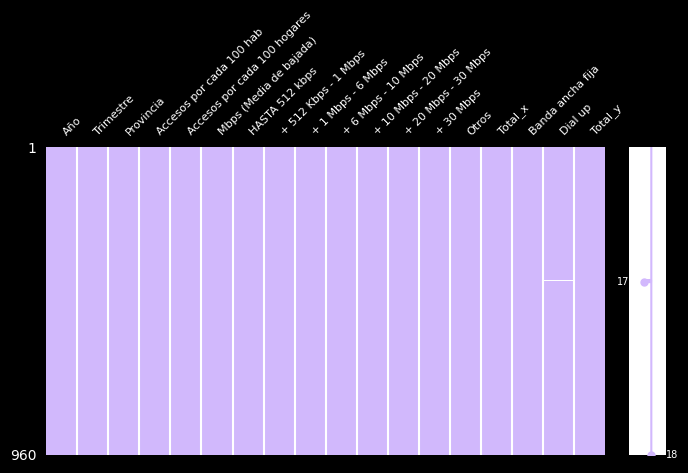

In [97]:
msno.matrix(A_T_P.sort_values(by=['Año', 'Trimestre']), figsize=(8, 4), color=(0.823, 0.722, 0.992), fontsize=8) # Se orden por fechas para ver cronológicamente que datos faltan

> Se puede ver esta tabla tiene un unico valor faltante.

### Duplicados

In [98]:
A_T_P[A_T_P.duplicated()]

Empty DataFrame
Columns: [Año, Trimestre, Provincia, Accesos por cada 100 hab, Accesos por cada 100 hogares, Mbps (Media de bajada), HASTA 512 kbps, + 512 Kbps - 1 Mbps, + 1 Mbps - 6 Mbps, + 6 Mbps - 10 Mbps, + 10 Mbps - 20 Mbps, + 20 Mbps - 30 Mbps, + 30 Mbps, Otros, Total_x, Banda ancha fija, Dial up, Total_y]
Index: []

> En esta tabla no hay duplicados.

###  Distribución de variables numéricas

> Estas columnas se analizan teniendo en cuenta que cada registro corresponde a una provincia en cierto trimestre de cierto año. Por eso se trata de enfatizar que los histogramas de algunas columnas representan conteos de conteos,es decir, el histograma arma rangos de cantidades y después se suman todas las cantidades que entren en ese rango.


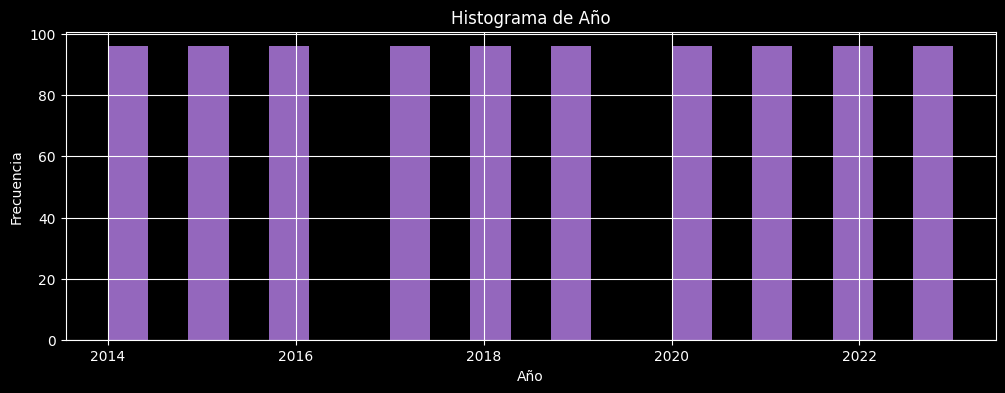

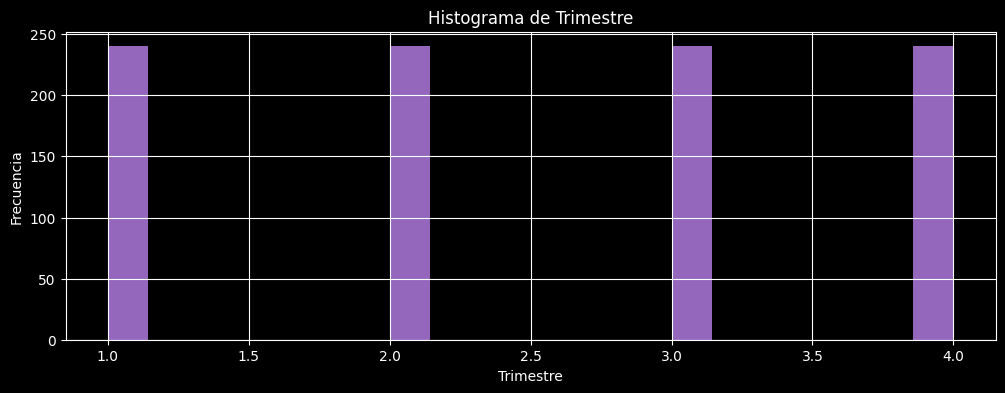

In [99]:
columnas = ['Año', 'Trimestre']
for i in columnas:
    plt.figure(figsize=(12,4))
    A_T_P[i].hist(bins=21,color='tab:purple')
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()

> Analizando las fechas de la tabla, se tiene exactamente la misma cantidad de datos para todos los años y trimestres.

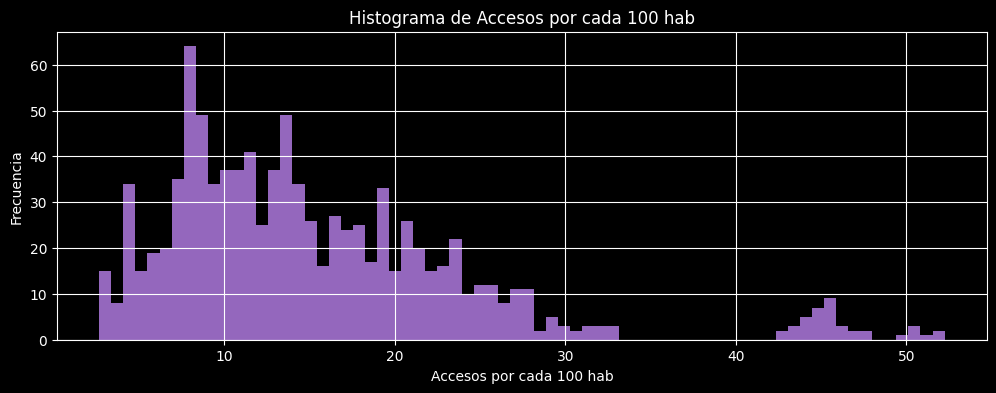

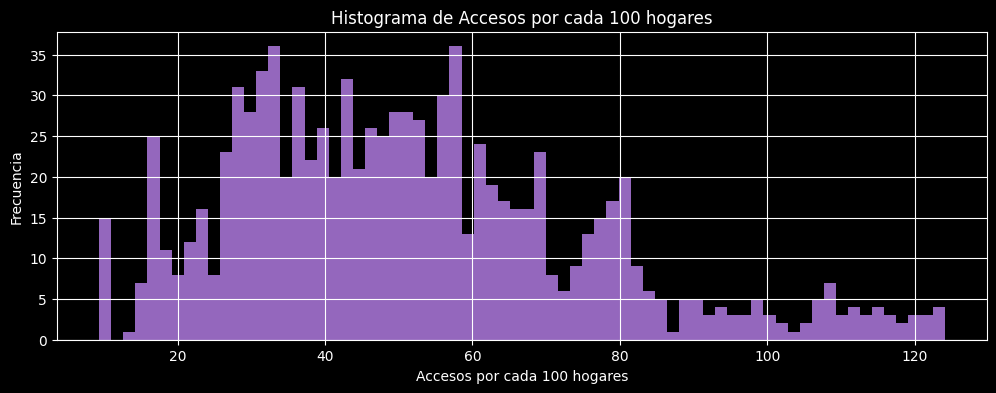

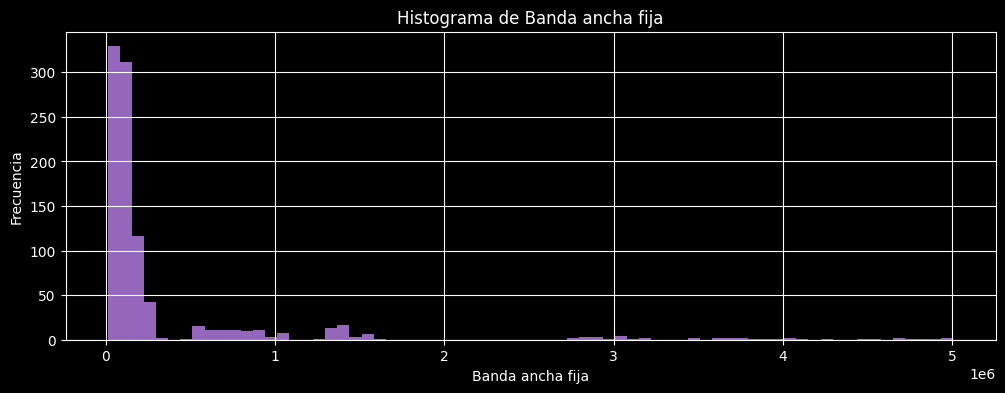

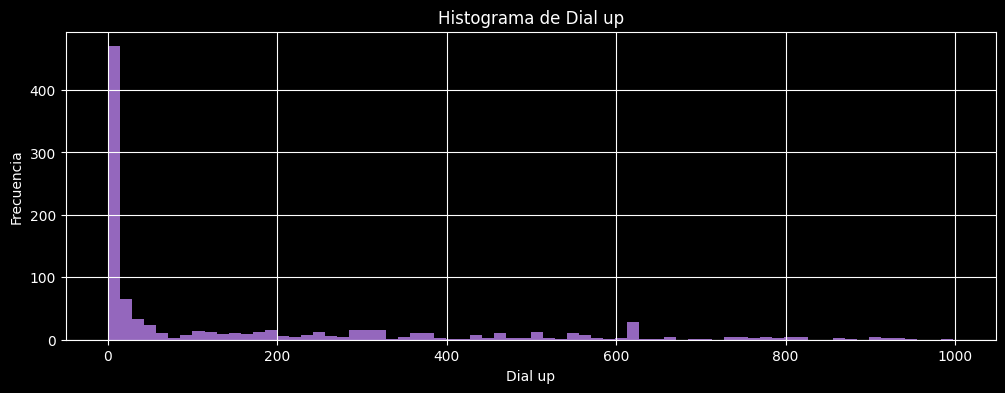

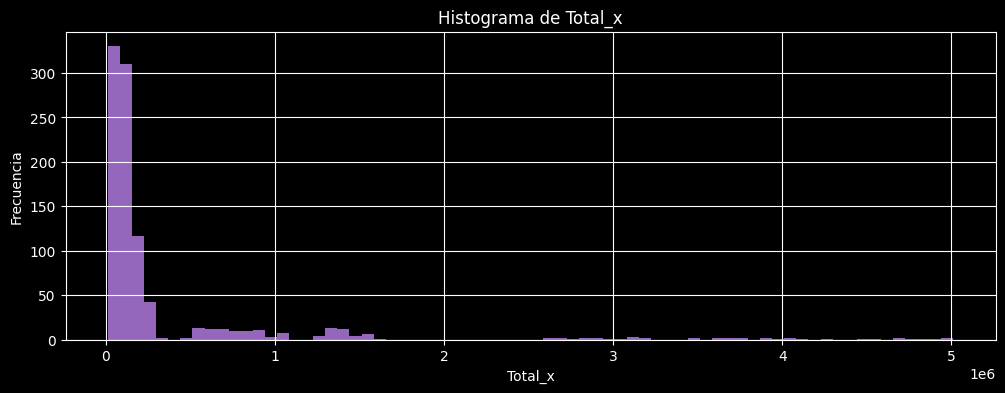

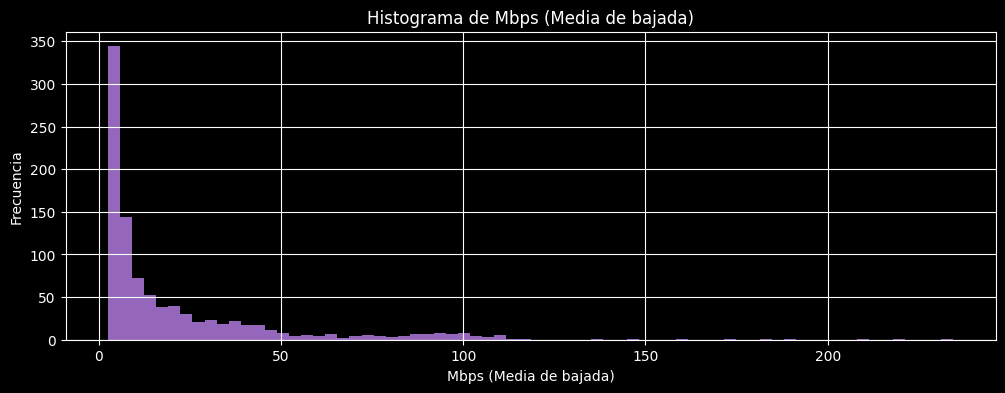

In [100]:
columnas = ['Accesos por cada 100 hab', 'Accesos por cada 100 hogares', 'Banda ancha fija', 'Dial up', 'Total_x', 'Mbps (Media de bajada)']
for i in columnas:
    plt.figure(figsize=(12,4))
    A_T_P[i].hist(bins=70,color='tab:purple')
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()

> Analizando las primeras variables numéricas de la tabla (eliminando los valores 0 para poder ver la distribuciones significantes) de cada columna se puede decir:


+ `Accesos por cada 100 hab` : el rango sobrepasa ligeramente el valor 50, pero hay muy pocos datos (casi ninguno) de 33 a 42 aproximadamente y los conteos se concentran alrededor del valor 10.


+ `Accesos por cada 100 hogares` : esta distribución es un poco más pareja, los conteos se concentran en un gran rango de valores entre 20 y 80, pero sigue habiendo cantidades significativas hasta el valor 120.


+ `Banda ancha fija` : hay varios outliers, los valores más bajos rondan alrededor de los 10 mil mientras que los más altos están en el orden de los 5 millones. Y el grueso de los valores relevantes se agrupan por debajo del medio millón.


+ `Dial up` : nuevamente se tiene mucho outliers en un rango de 1 a cerca de un millón y los valores se concentran en los más bajos.


+ `Total_x` : también hay varios outliers y con algunos valores de hasta 5 millones


+ `Mbps (Media de bajada)` : en el promedio de bajada se ve que la distribución se acumula en los valores más bajos. **Esta columna ya no son conteos si no que son el promedio del valor de los Mbps, entonces desde ya se puede concluir que la media es repetidamente en muchos lugares muy baja, lo que da lugar a mejorar el servicio ampliando el negocio.**



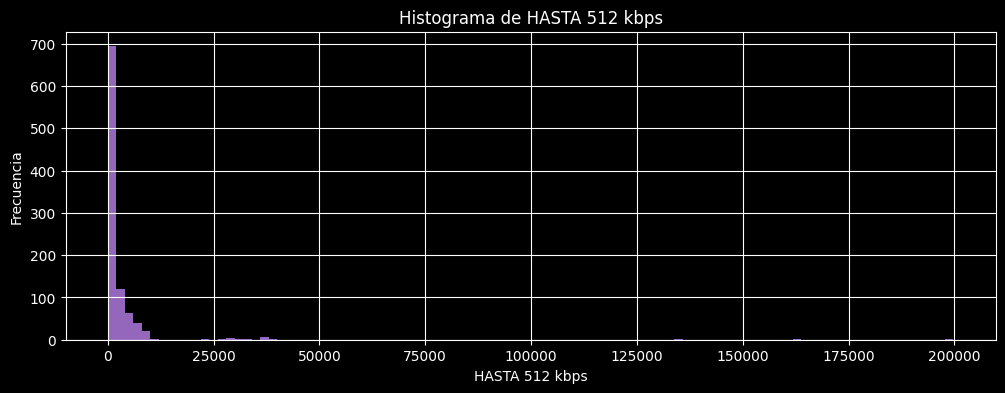

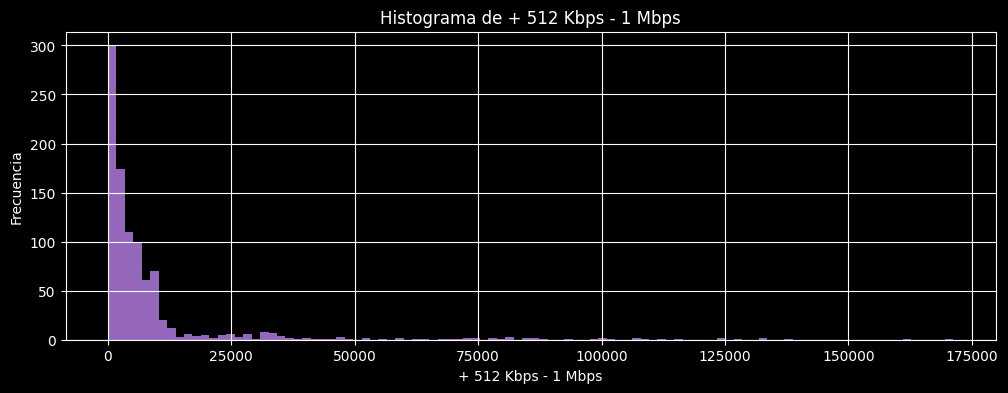

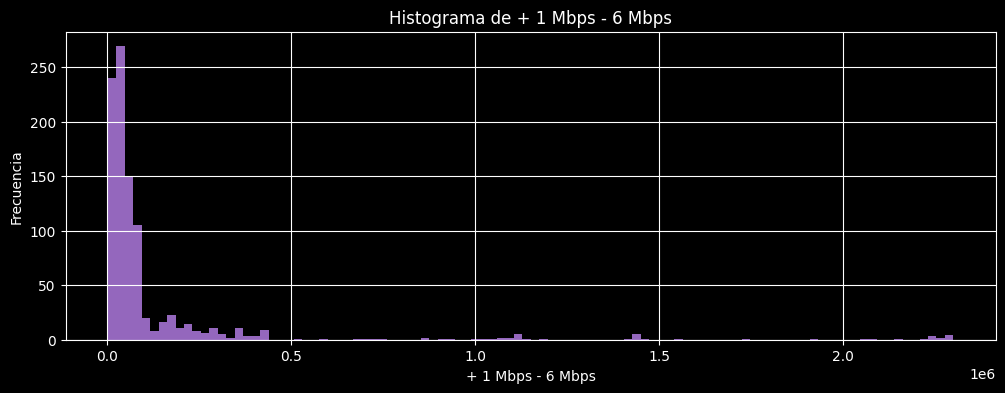

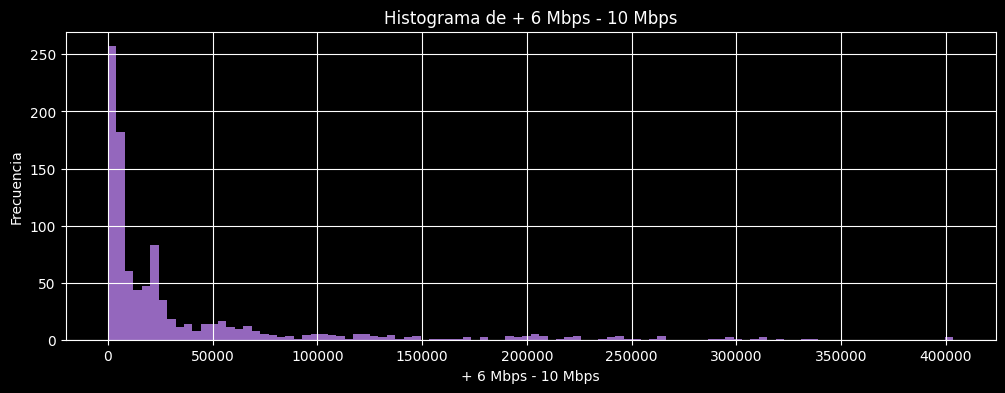

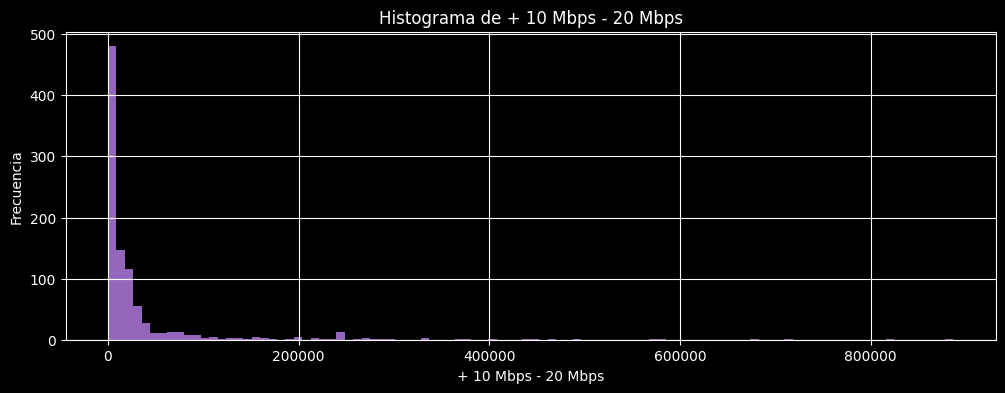

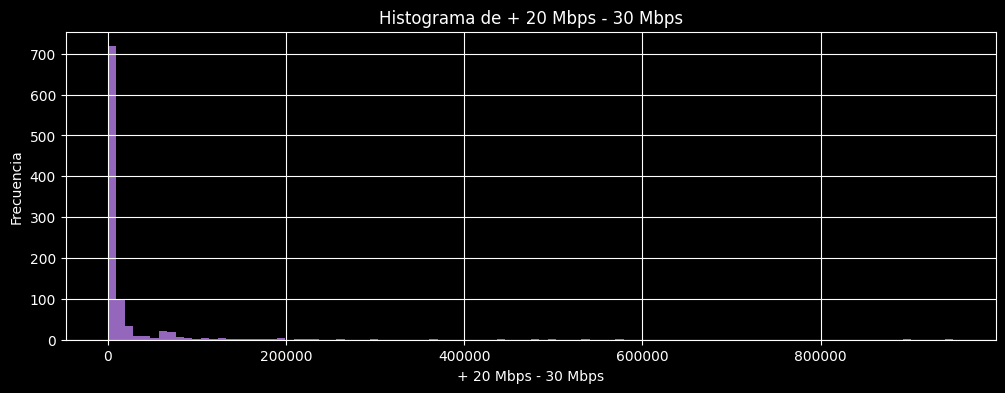

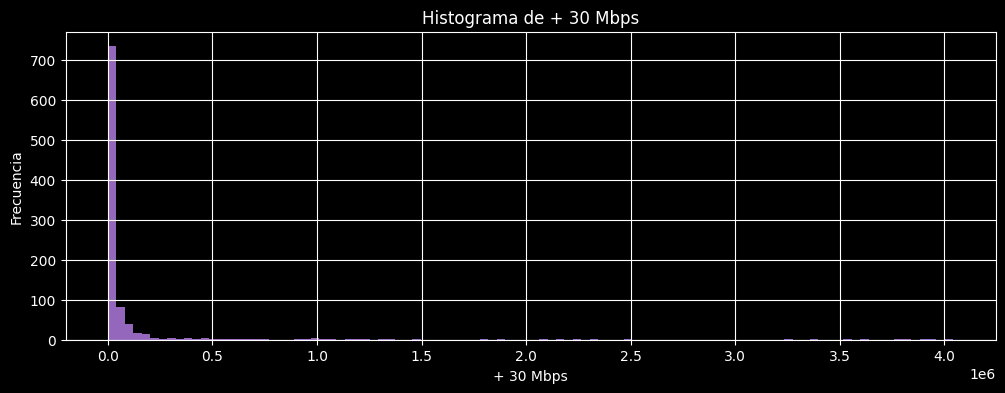

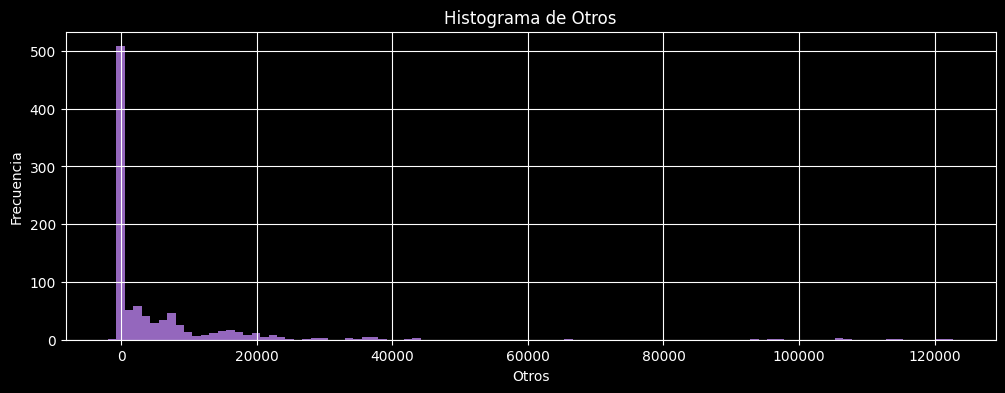

In [101]:
columnas = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otros' ]
for i in columnas:
    plt.figure(figsize=(12,4))
    A_T_P[i].hist(bins=100,color='tab:purple')
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()

> En esta parte de la tabla se puede ver como todos los rangos de velocidad tienen una distribución similar, con los datos acumulandose en cantidades bajas pero con algunos outliers bastante marcados, como por ejemplo en el rango de 1 a 6 Mbps, que algún lugar en cierto trimestre de cierto año llegaron a más de 2 millones de conteos.

### Variable categórica 'Provincia'

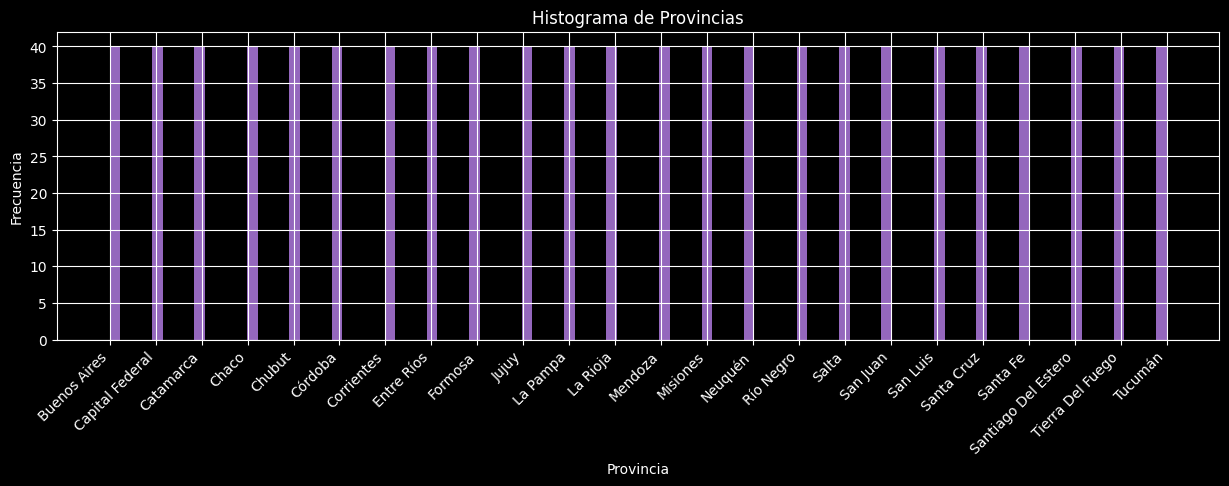

In [102]:
plt.figure(figsize=(15,4))
A_T_P['Provincia'].hist(bins=100,color='tab:purple')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.title(f'Histograma de Provincias')
plt.show()

> Todas las provincias tienen la misma cantidad de registros

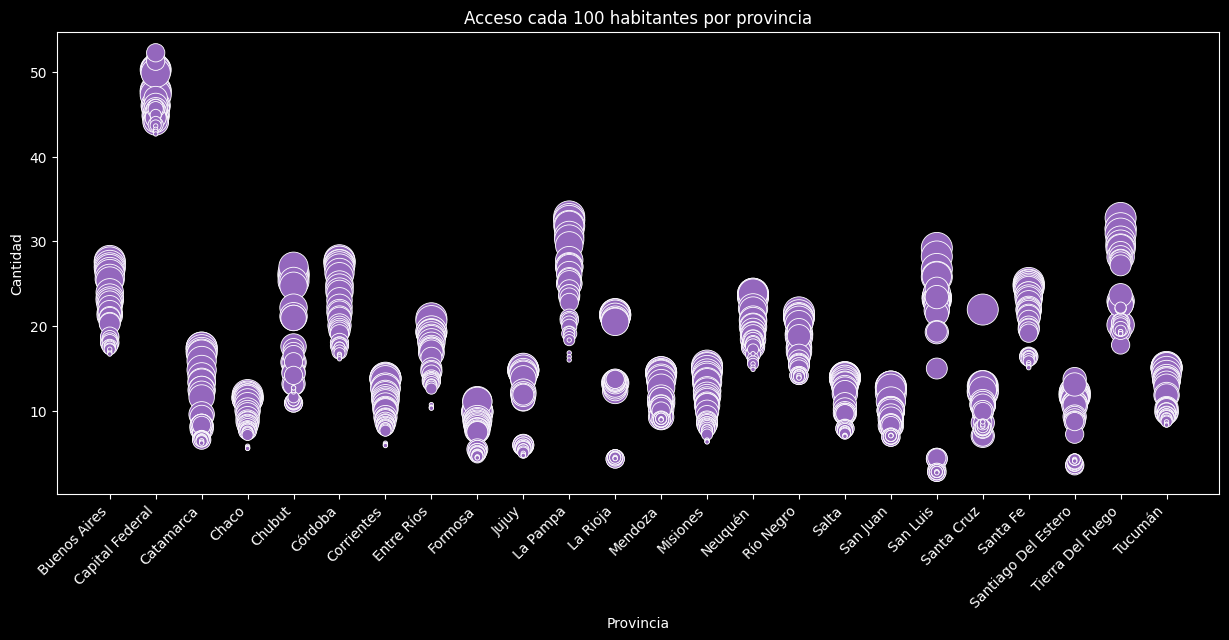

In [103]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data=A_T_P, x='Provincia', y='Accesos por cada 100 hab', size='Año', legend=False, sizes=(10, 500), color='tab:purple')
ax.set_xlabel('Provincia')
ax.set_ylabel('Cantidad')
ax.set_title('Acceso cada 100 habitantes por provincia')
plt.xticks(rotation=45, ha='right')
plt.show()


> Con este gráfico se puede ver como varía en distintos trimestres el acceso cada 100 habitantes, como los porcentajes más altos de acceso están en CABA y como algunas provincias tienen más diferencias entre trimestres como San Luis a diferencia de otras que casi no tuvieron cambios como Chaco y Formosa. Como sugieren los tamaños de las burbujas, la mayorias de provincias tiene tendencia al aumento del numero de conexiones, pero hay unas cuantas donde decrecio, como Santiago del Estero, lo que puede indicar oportunidad de mercado.

## P_P_L

### Información general

In [104]:
P_P_L.describe().T

count         mean           std  min   25%    50%  \
ADSL                 3048.0   274.406168   1557.789333  0.0   0.0    0.0   
Cablemodem           3048.0  1975.877297  23257.488052  0.0   0.0    0.0   
Dail Up              3048.0     3.868438     43.350134  0.0   0.0    0.0   
Fibra Optica         3048.0  1281.972113   8505.772246  0.0   0.0    1.0   
Otros1               3048.0    58.340879    797.564486  0.0   0.0    0.0   
Satelital            3048.0     0.981627     13.710292  0.0   0.0    0.0   
Wimax                3048.0     0.717848     15.162065  0.0   0.0    0.0   
Wireless             3048.0   191.660105    715.329619  0.0   0.0   29.0   
Total general        3048.0  3787.824475  31331.988820  0.0  29.0  171.0   
Otros                 868.0   329.542627   2302.063594  0.0   1.0    7.5   
HASTA 512 kbps       3048.0     9.746719    468.440628  0.0   0.0    0.0   
+ 512 Kbps - 1 Mbps  3048.0    23.537402    136.984264  0.0   0.0    0.0   
+ 1 Mbps - 6 Mbps    3048.0   185.790354    670.086101  0.0   0.0    8.0   
+ 6 Mbps - 10 Mbps   3048.0   430.245735   2451.525404  0.0   0.0   26.0   
+ 10 Mbps - 20 Mbps  3048.0   133.546916    930.284167  0.0   0.0    0.0   
+ 20 Mbps - 30 Mbps  3048.0   487.869751   2782.120252  0.0   0.0    0.0   
+ 30 Mbps            3048.0  2420.638451  26991.214941  0.0   0.0    0.0   

                         75%        max  
ADSL                   84.00    58700.0  
Cablemodem             10.25  1198835.0  
Dail Up                 0.00     2050.0  
Fibra Optica          158.25   269623.0  
Otros1                  0.00    27703.0  
Satelital               1.00      742.0  
Wimax                   0.00      444.0  
Wireless              128.00    19906.0  
Total general        1073.75  1474367.0  
Otros                  72.00    57702.0  
HASTA 512 kbps          1.00    25856.0  
+ 512 Kbps - 1 Mbps     3.00     4544.0  
+ 1 Mbps - 6 Mbps     108.00    19550.0  
+ 6 Mbps - 10 Mbps    234.25    77292.0  
+ 10 Mbps - 20 Mbps    22.00    29377.0  
+ 20 Mbps - 30 Mbps    29.00    65559.0  
+ 30 Mbps               6.00  1302005.0

### Faltantes

<Axes: >

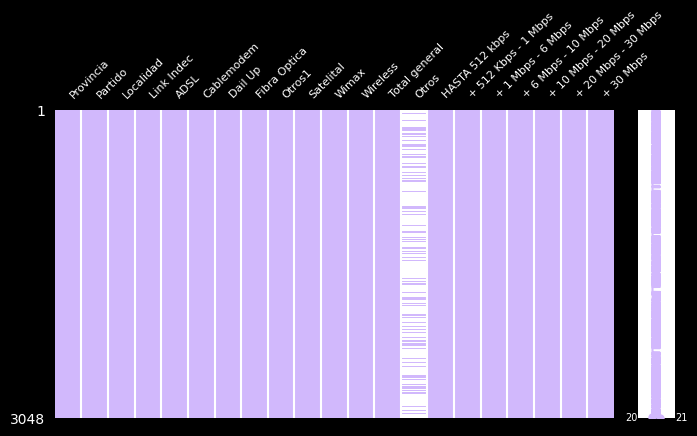

In [105]:
msno.matrix(P_P_L, figsize=(8, 4), color=(0.823, 0.722, 0.992), fontsize=8)

> Se analiza eliminar la columna otros por tener tantos faltantes

<Axes: >

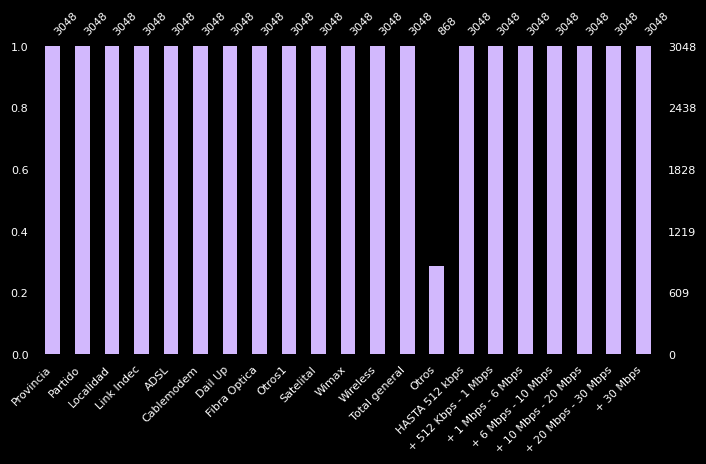

In [106]:
msno.bar(P_P_L, figsize=(8, 4), color=(0.823, 0.722, 0.992), fontsize=8)

In [107]:
P_P_L['Otros'].describe()

count      868.000000
mean       329.542627
std       2302.063594
min          0.000000
25%          1.000000
50%          7.500000
75%         72.000000
max      57702.000000
Name: Otros, dtype: float64

> Al final, no se elimina la columna porque tiene valores grandes que pueden ser un punto util para el analisis de negocio.


### Duplicados

In [108]:
P_P_L[P_P_L.duplicated()]

Empty DataFrame
Columns: [Provincia, Partido, Localidad, Link Indec, ADSL, Cablemodem, Dail Up, Fibra Optica, Otros1, Satelital, Wimax, Wireless, Total general, Otros, HASTA 512 kbps, + 512 Kbps - 1 Mbps, + 1 Mbps - 6 Mbps, + 6 Mbps - 10 Mbps, + 10 Mbps - 20 Mbps, + 20 Mbps - 30 Mbps, + 30 Mbps]
Index: []

[0 rows x 21 columns]

> Esta tabla tampoco tiene duplicados.

###  Distribución de variables numéricas

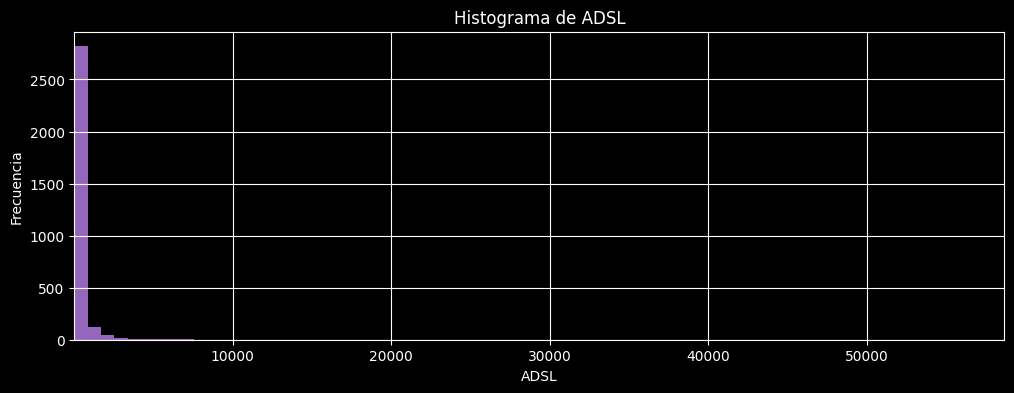

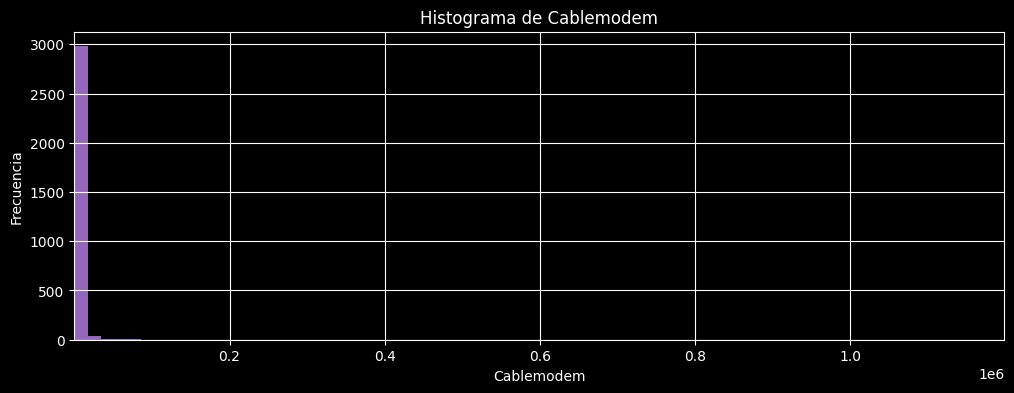

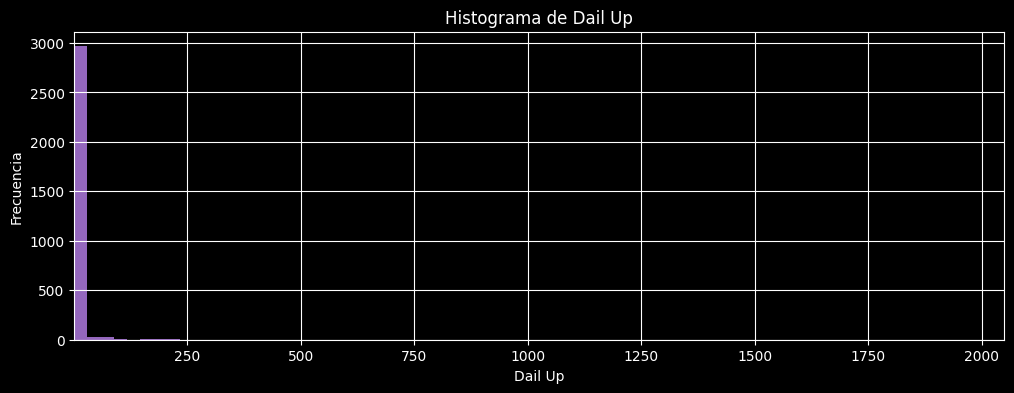

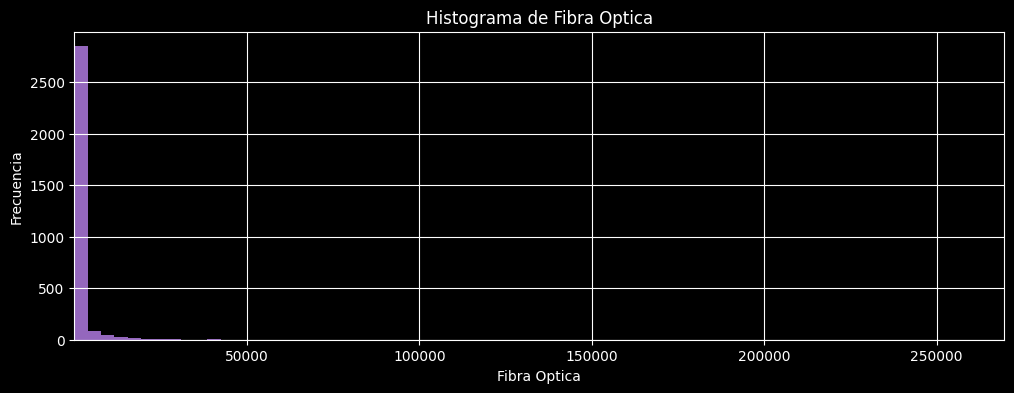

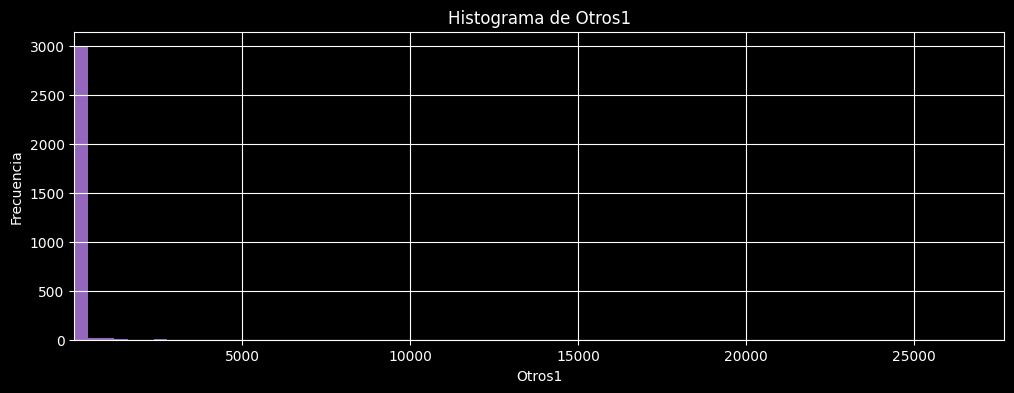

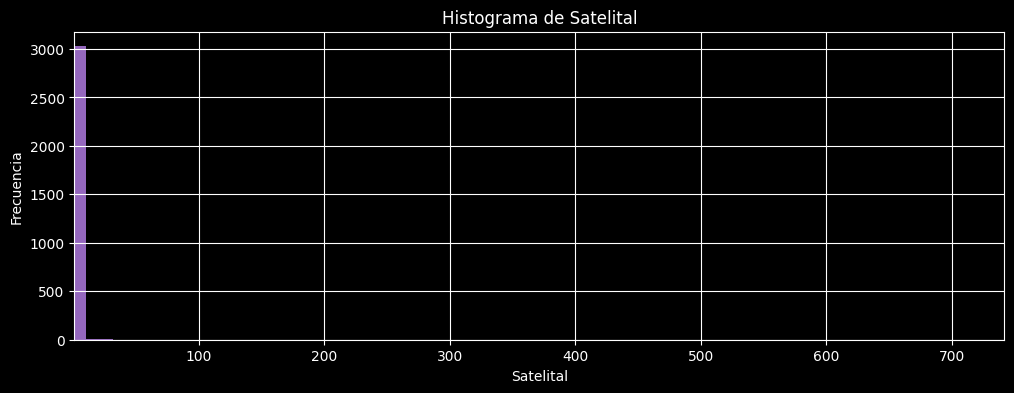

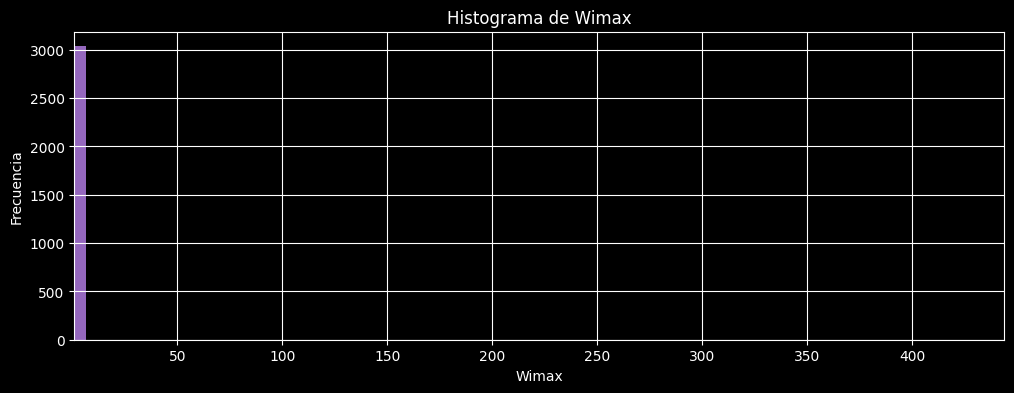

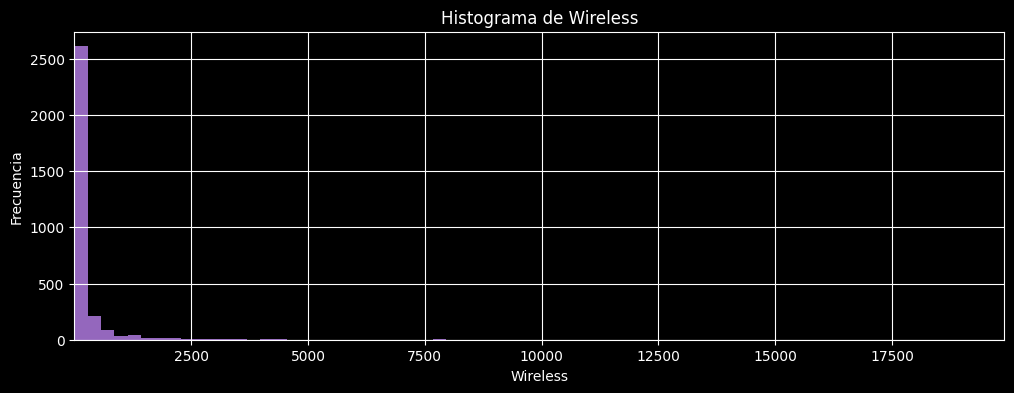

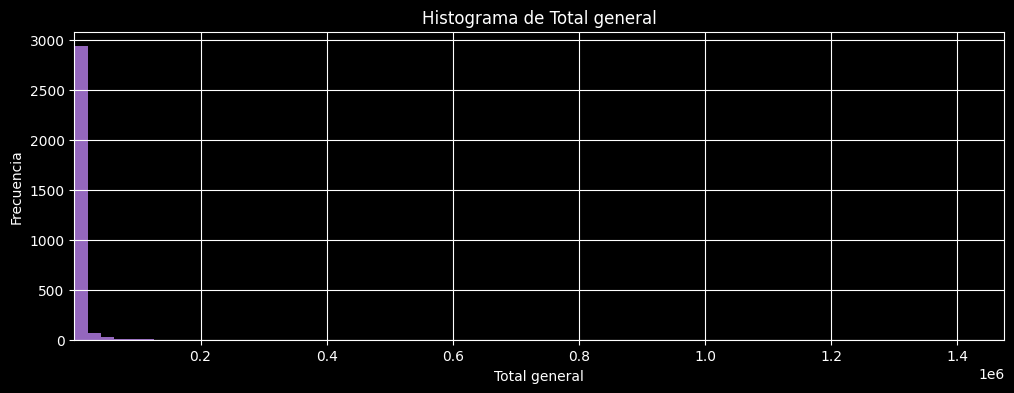

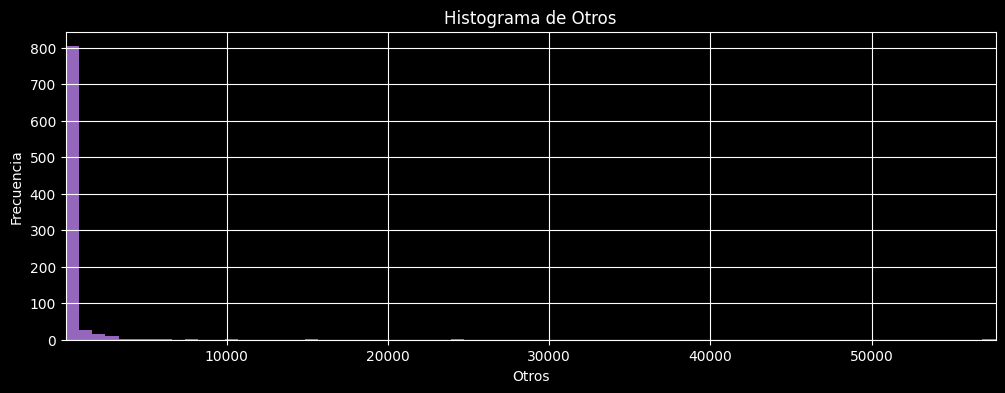

In [109]:
columnas = ['ADSL', 'Cablemodem','Dail Up', 'Fibra Optica', 'Otros1', 'Satelital', 'Wimax', 'Wireless', 'Total general', 'Otros']

for i in columnas:
    plt.figure(figsize=(12,4))
    P_P_L[i].hist(bins=70,color='tab:purple')
    plt.xlim(1, P_P_L[i].max())
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()

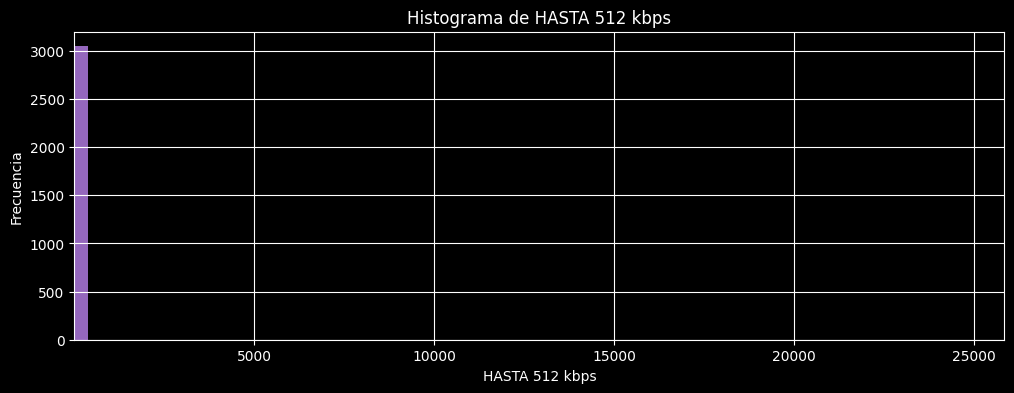

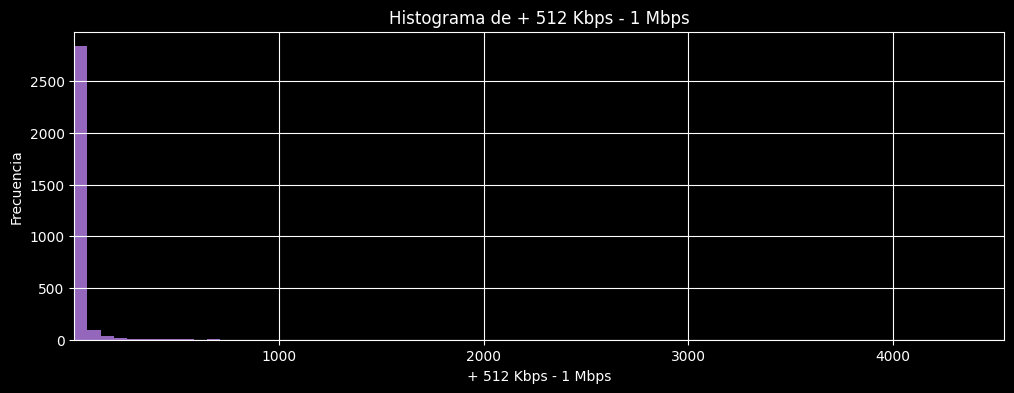

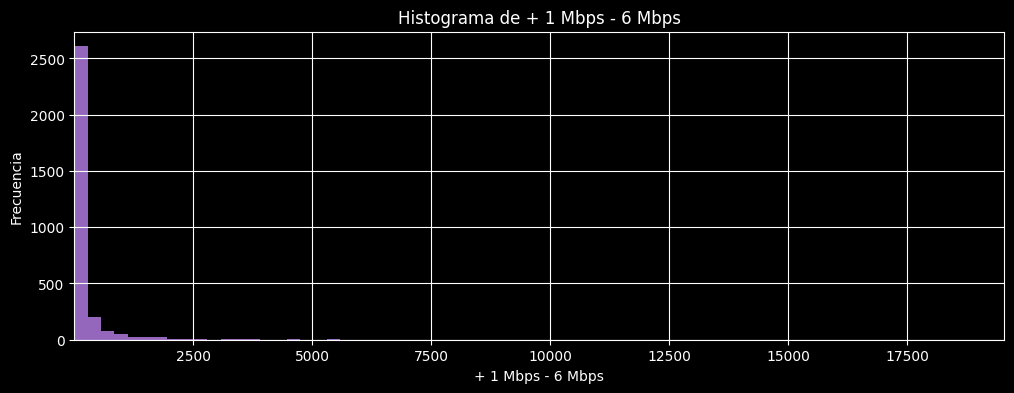

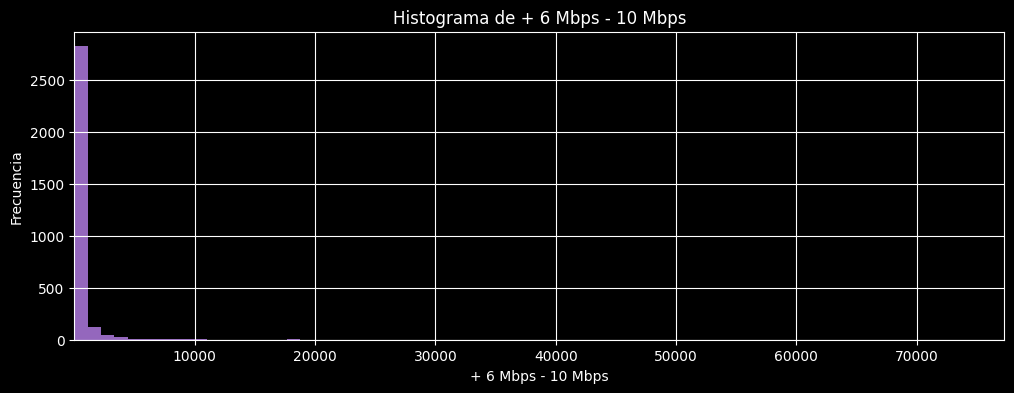

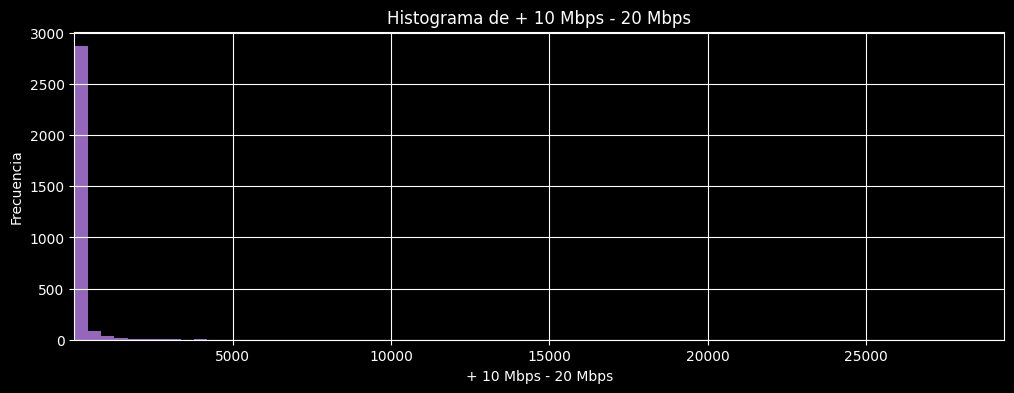

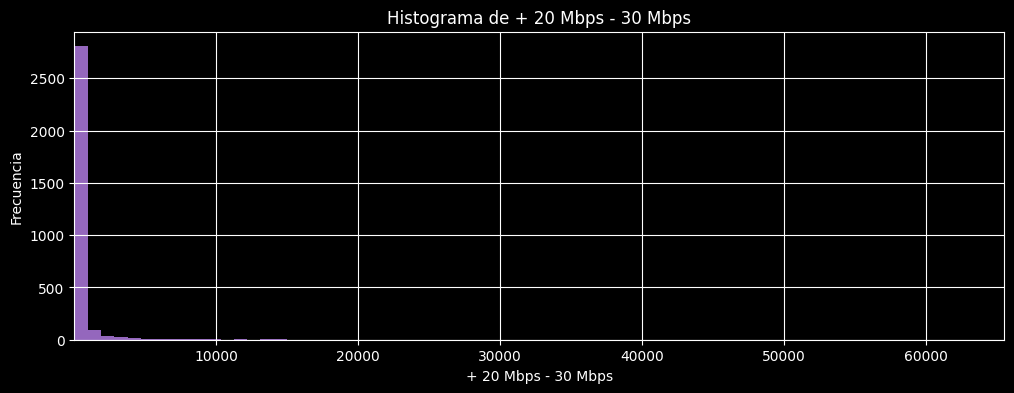

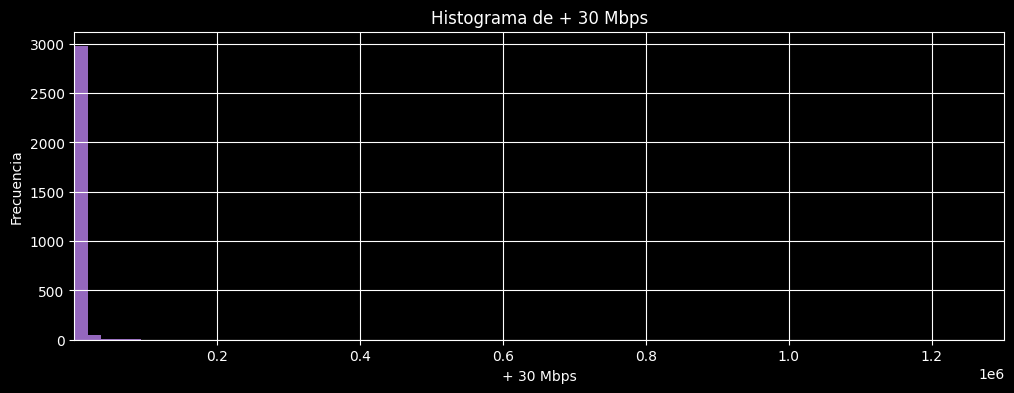

In [110]:
columnas = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']
for i in columnas:
    plt.figure(figsize=(12,4))
    P_P_L[i].hist(bins=70,color='tab:purple')
    plt.xlim(1, P_P_L[i].max())
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()

> En esta tabla todos los valores numéricos son conteos, así que los histogramas no dan mucha información más que los rangos y la magnitud de los outliers que existen. De todas formas lo más probable es que estos valores extremos sean valores reales de lugares con mucha densidad poblacional así que no se realiza ninguna acción al respecto.

### Variable categórica 'Provincia'

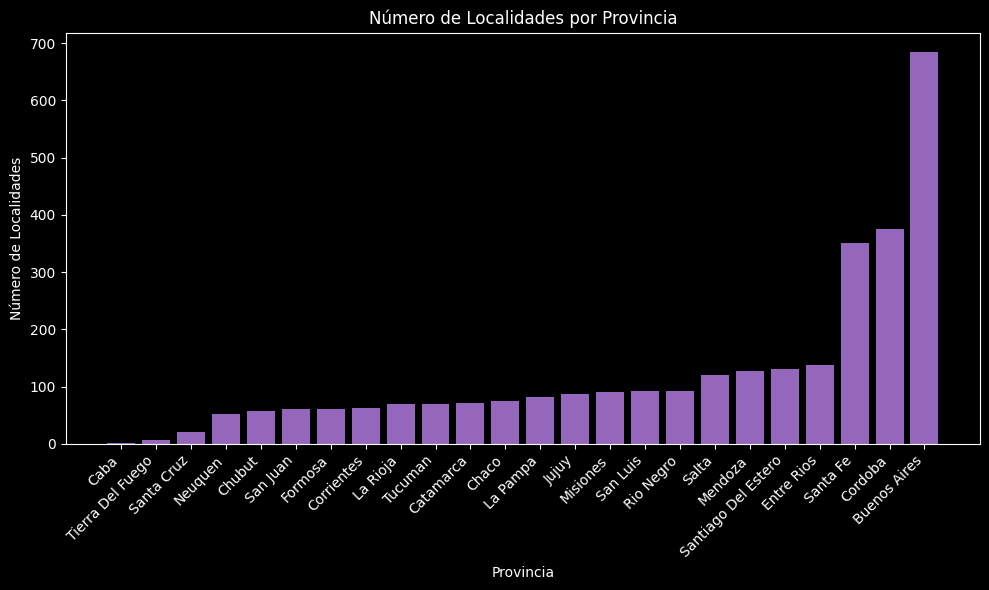

In [111]:
localidades_por_provincia = P_P_L.groupby('Provincia')['Localidad'].nunique().reset_index()
localidades_por_provincia.columns = ['Provincia', 'Numero de Localidades']
localidades_por_provincia = localidades_por_provincia.sort_values(by='Numero de Localidades')
plt.figure(figsize=(10, 6))
plt.bar(localidades_por_provincia['Provincia'], localidades_por_provincia['Numero de Localidades'], color='tab:purple')
plt.xlabel('Provincia')
plt.ylabel('Número de Localidades')
plt.title('Número de Localidades por Provincia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [112]:
P_P_L[P_P_L['Provincia'] == 'Caba']

Provincia                          Partido  \
709      Caba  Ciudad Autónoma De Buenos Aires   

                           Localidad Link Indec   ADSL  Cablemodem  Dail Up  \
709  Ciudad Autónoma De Buenos Aires    2000010  58700     1198835     2050   

     Fibra Optica  Otros1  Satelital  ...  Wireless  Total general  Otros  \
709        182520   27703         67  ...      4492        1474367    0.0   

     HASTA 512 kbps  + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  \
709           516.0               4544.0            19550.0   

     + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  + 30 Mbps  
709             54942.0              29377.0              63433.0  1302005.0  

[1 rows x 21 columns]

> Como era de esperarse, las provincias más grandes son las que más localidades registradas tienen, por otro lado se cuenta a CABA como una provincia, pero en realidad es una ciudad, no tiene localidades dentro de ella.

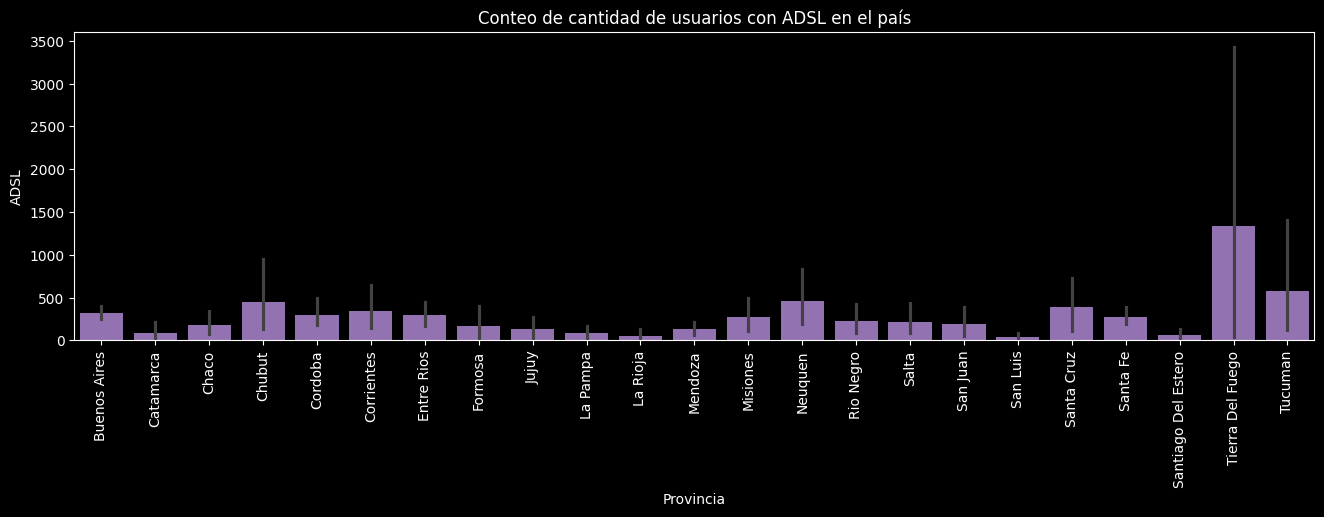

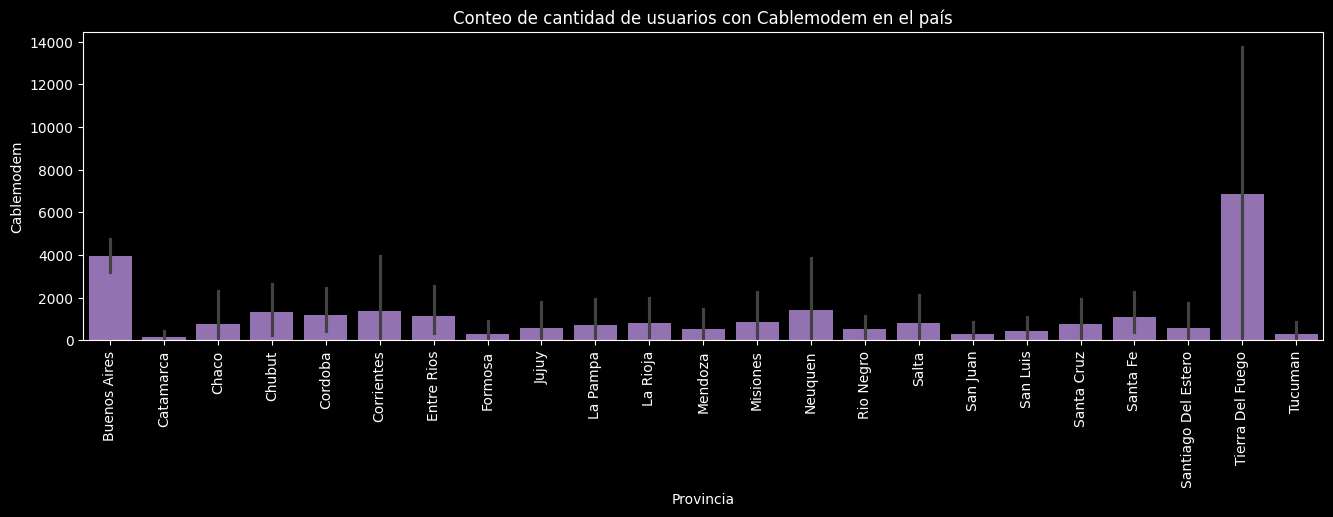

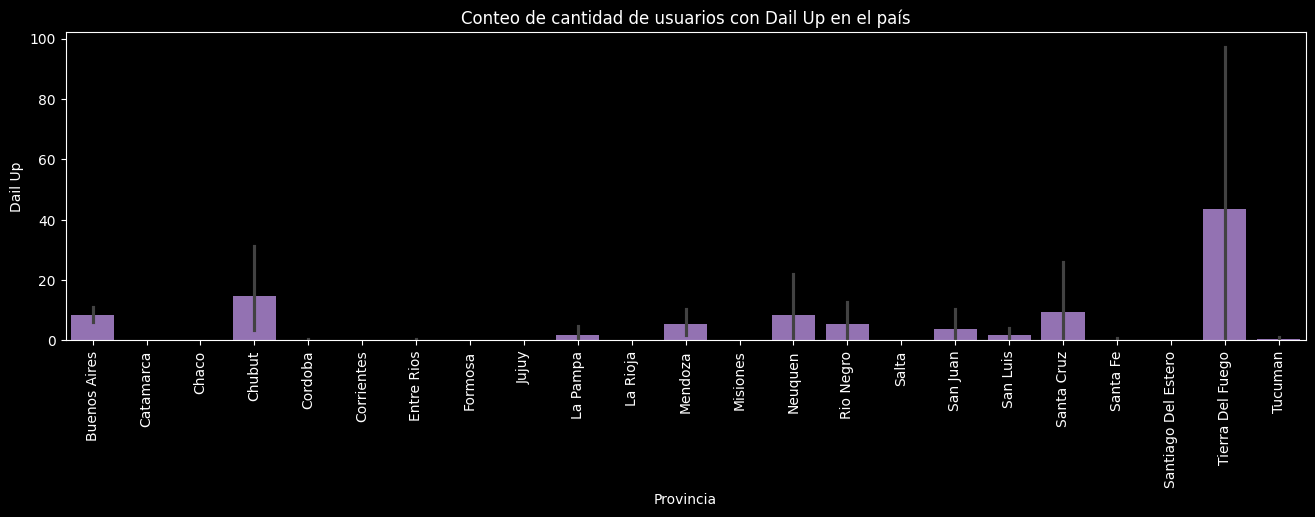

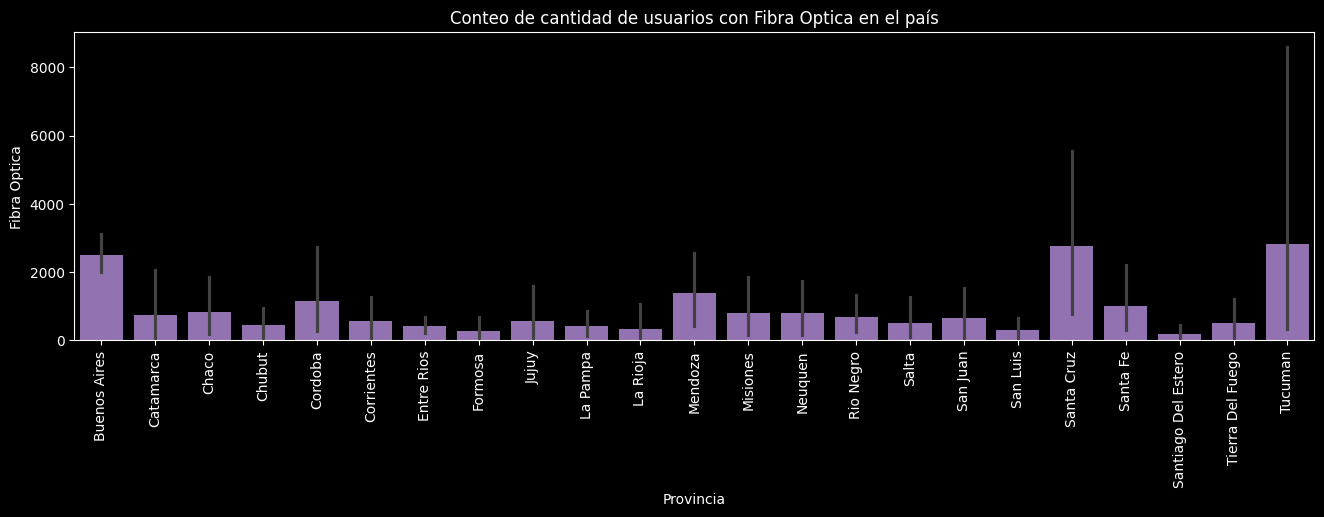

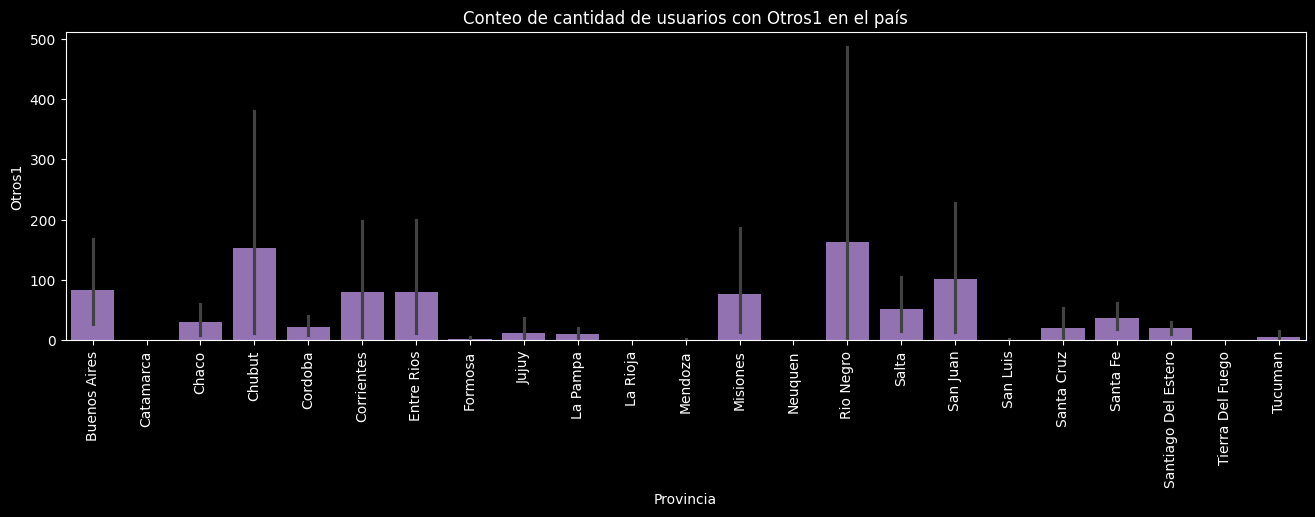

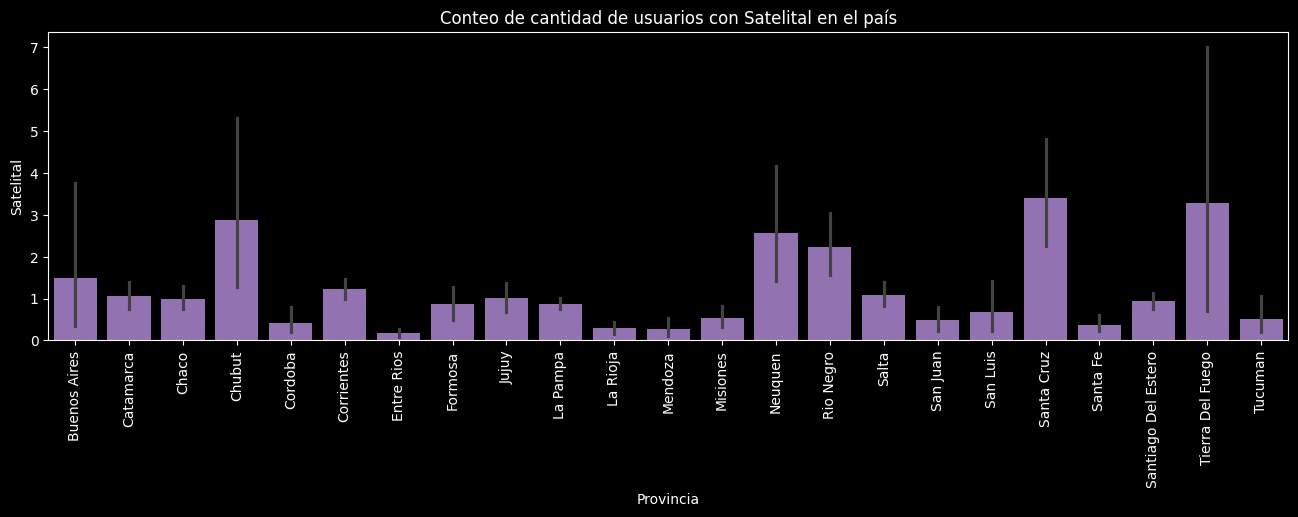

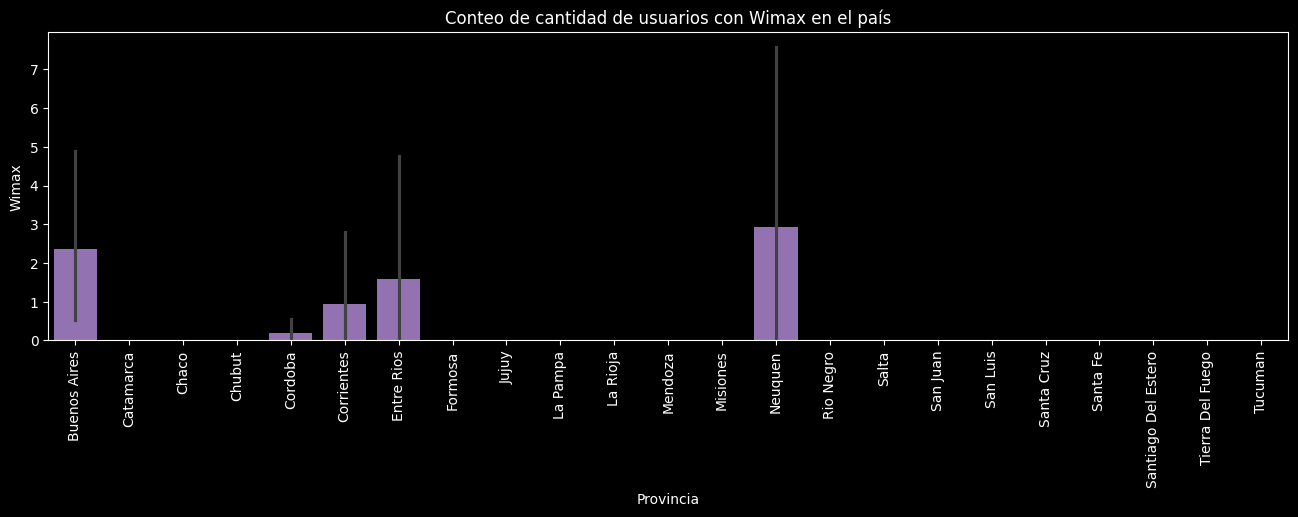

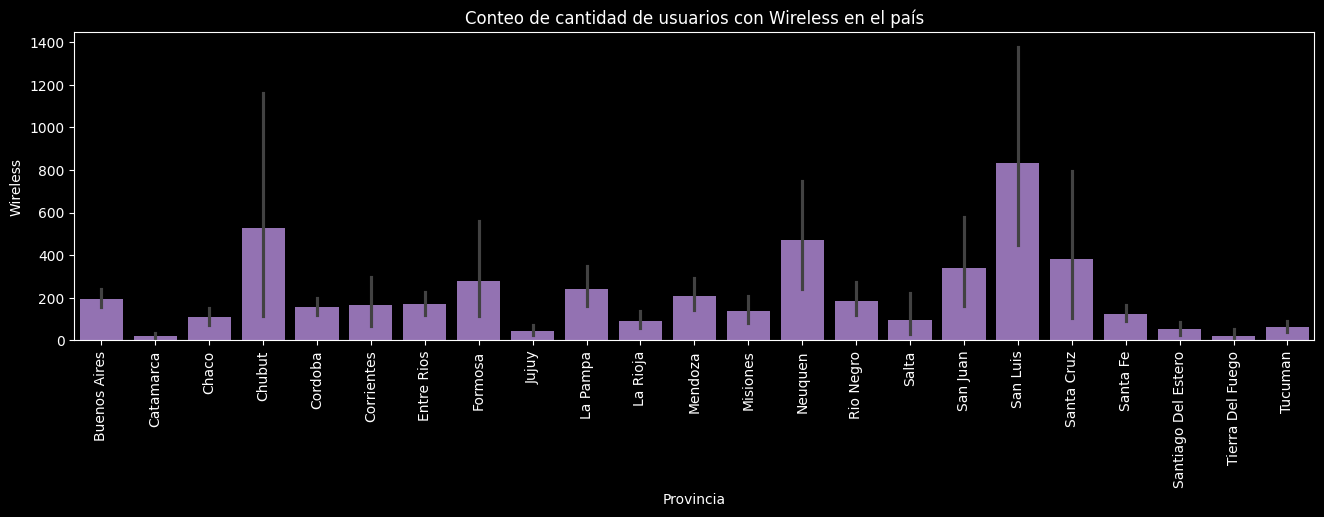

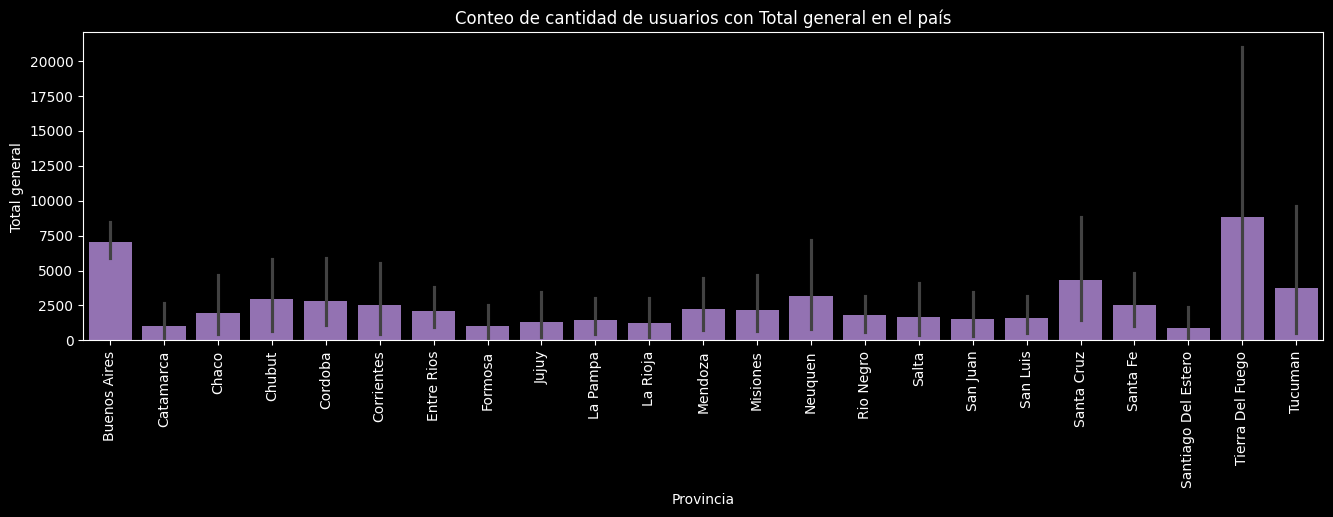

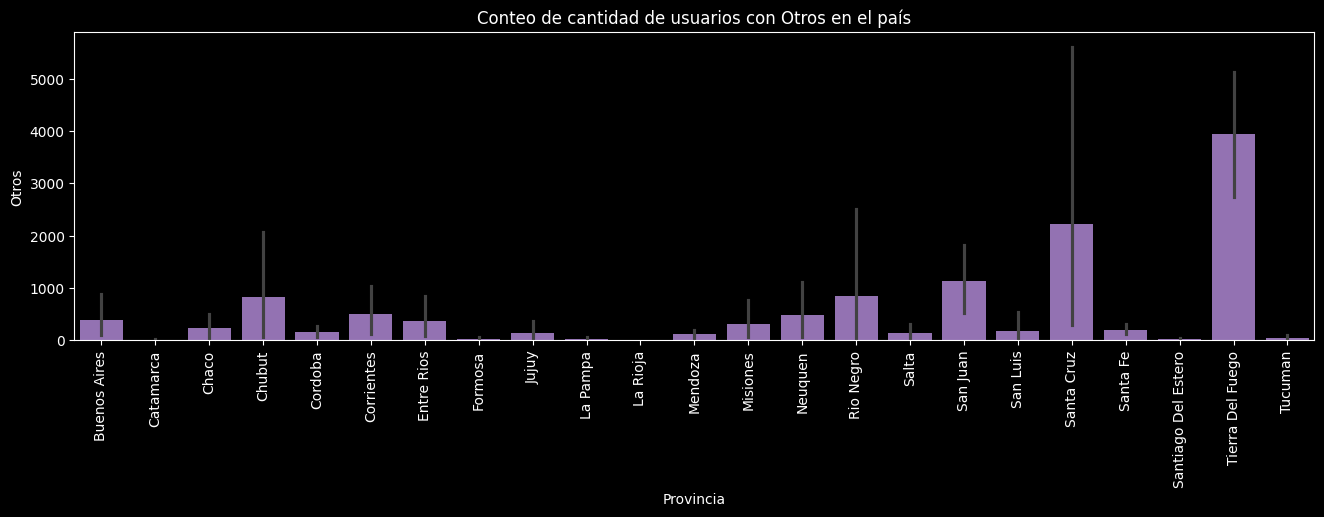

In [113]:
columnas = ['ADSL', 'Cablemodem','Dail Up', 'Fibra Optica', 'Otros1', 'Satelital', 'Wimax', 'Wireless', 'Total general', 'Otros']
for i in columnas:
    plt.figure(figsize=(16, 4))
    sns.barplot(x='Provincia', y= i, data=P_P_L[P_P_L['Provincia'] != 'Caba'], color='tab:purple')
    plt.ylabel(f'{i}')
    plt.xlabel('Provincia')
    plt.xticks(rotation=90)
    plt.title(f'Conteo de cantidad de usuarios con {i} en el país')
    plt.show()

> En estos gráficos se ven las tendencias de tecnologías en las provincias, como que Wireless, Satelital, Fibra Óptica, Cable Módem y ADSL se encuentra en todo el país, mientras que Dial Up y Wimax se utilizan en muy pocas provincias, probablemente por ser tecnologías más viejas.

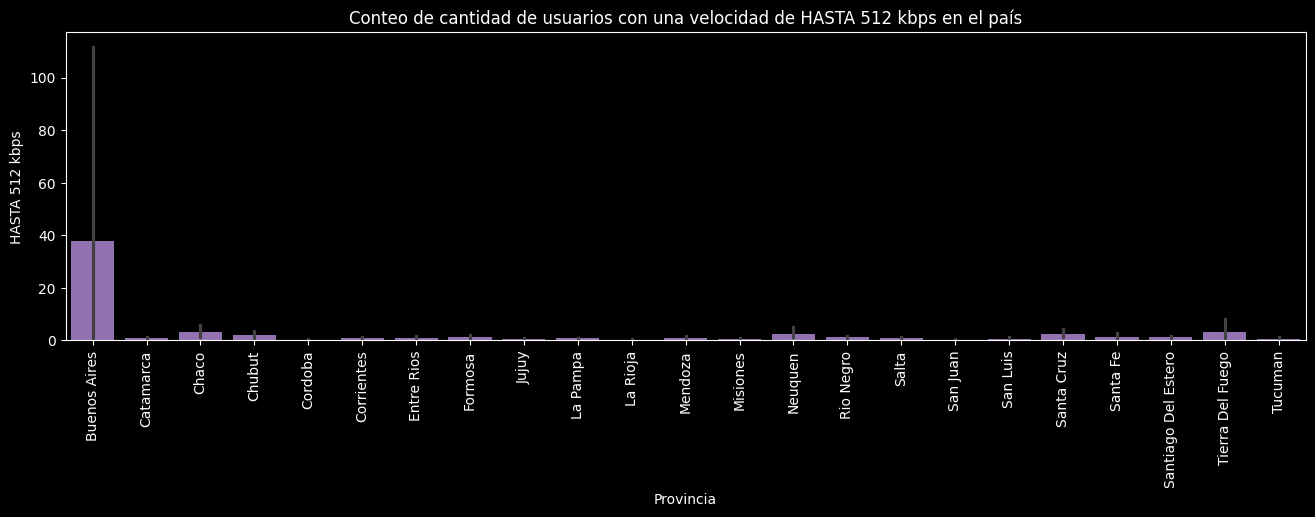

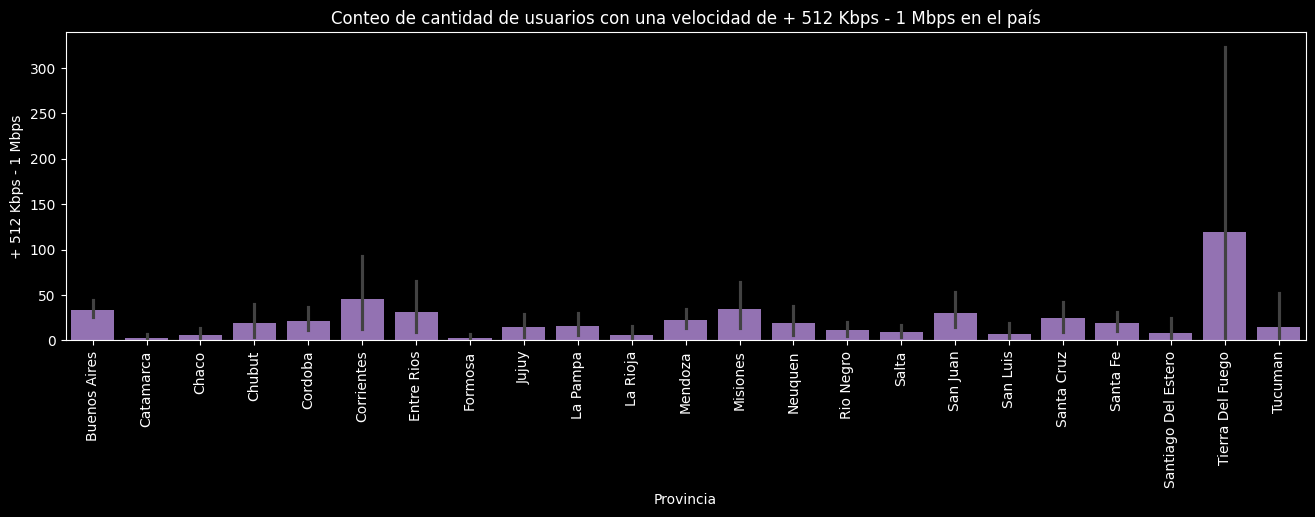

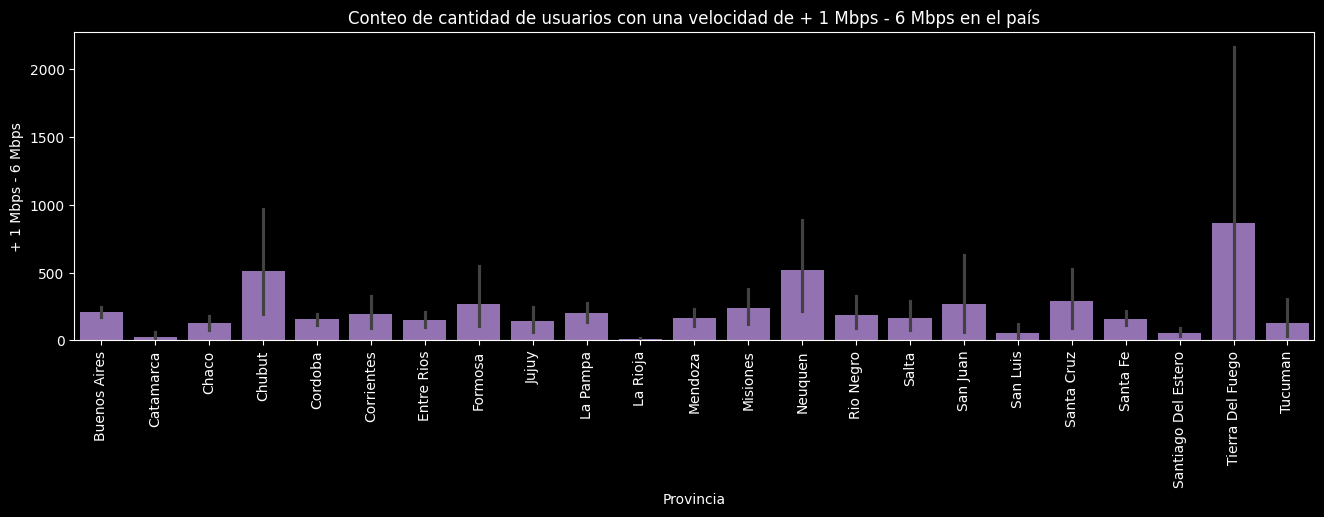

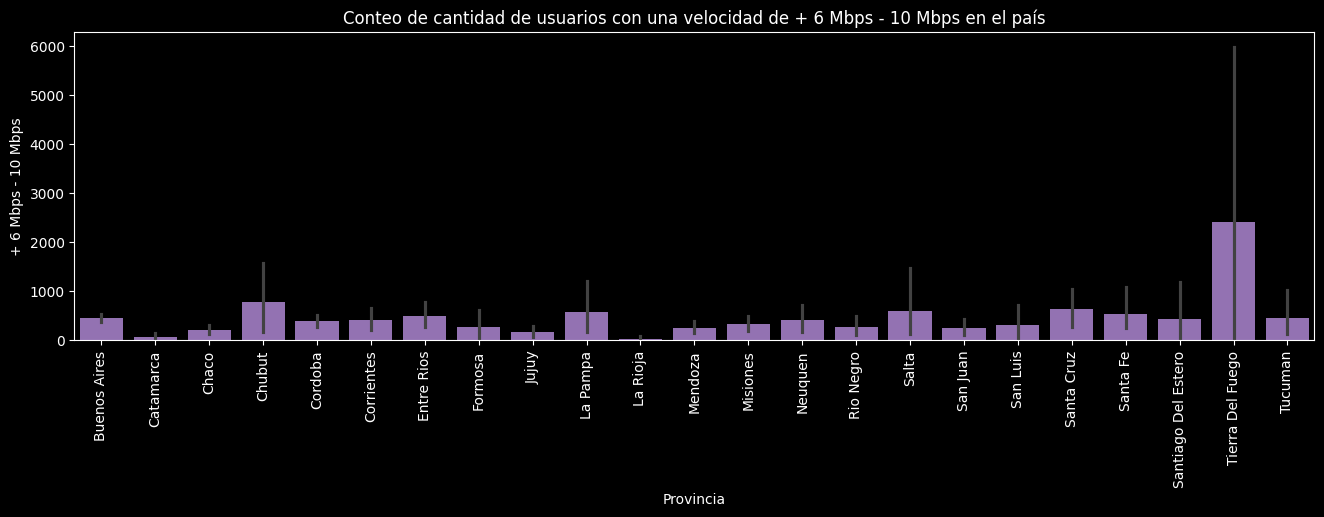

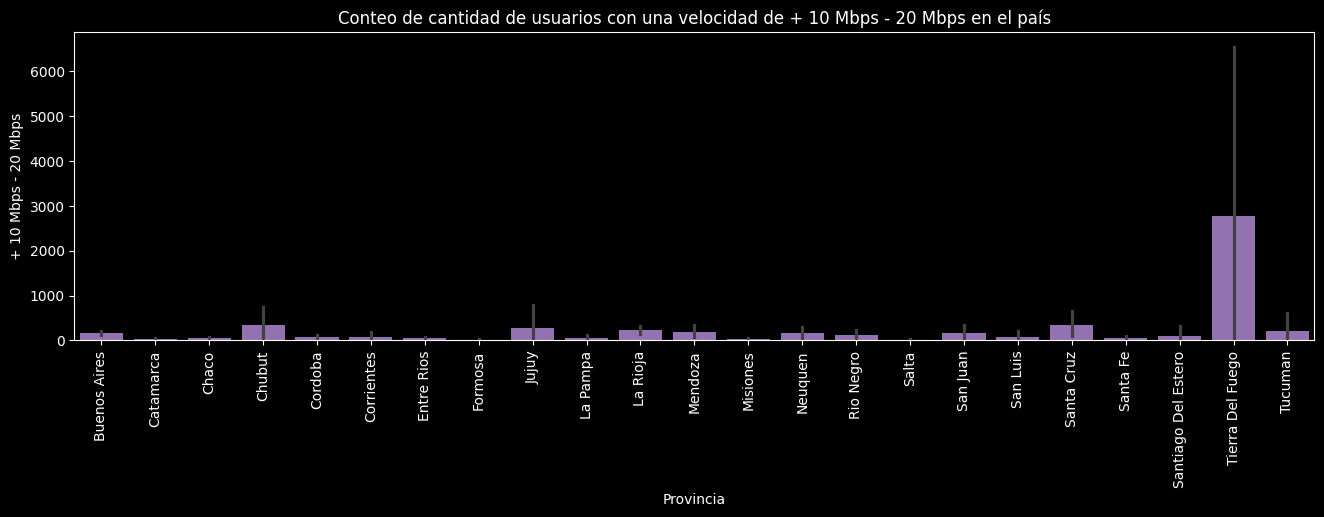

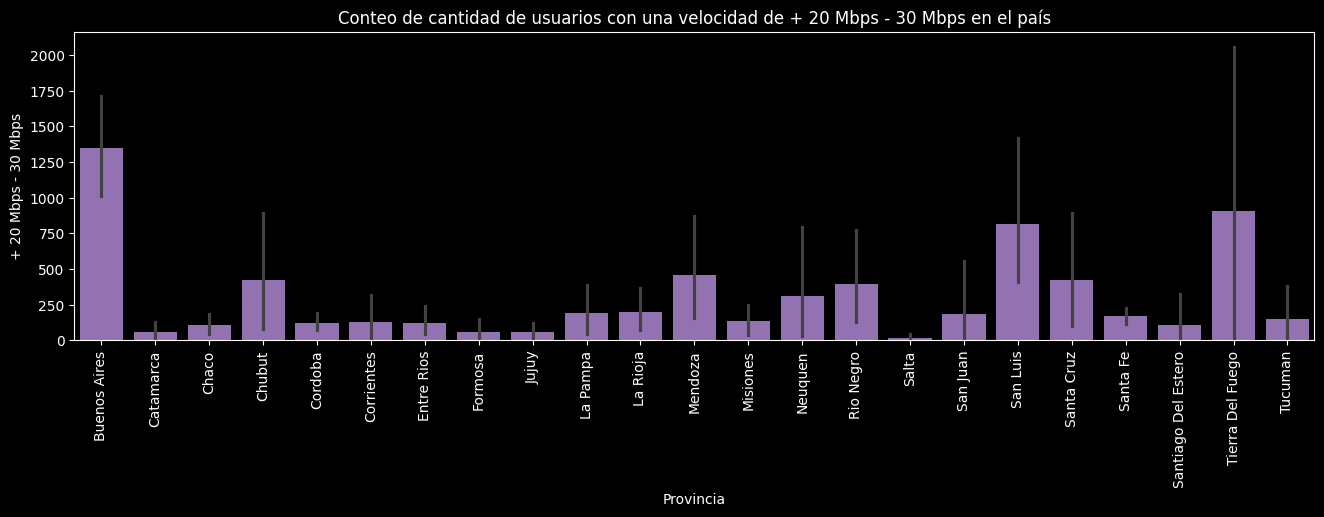

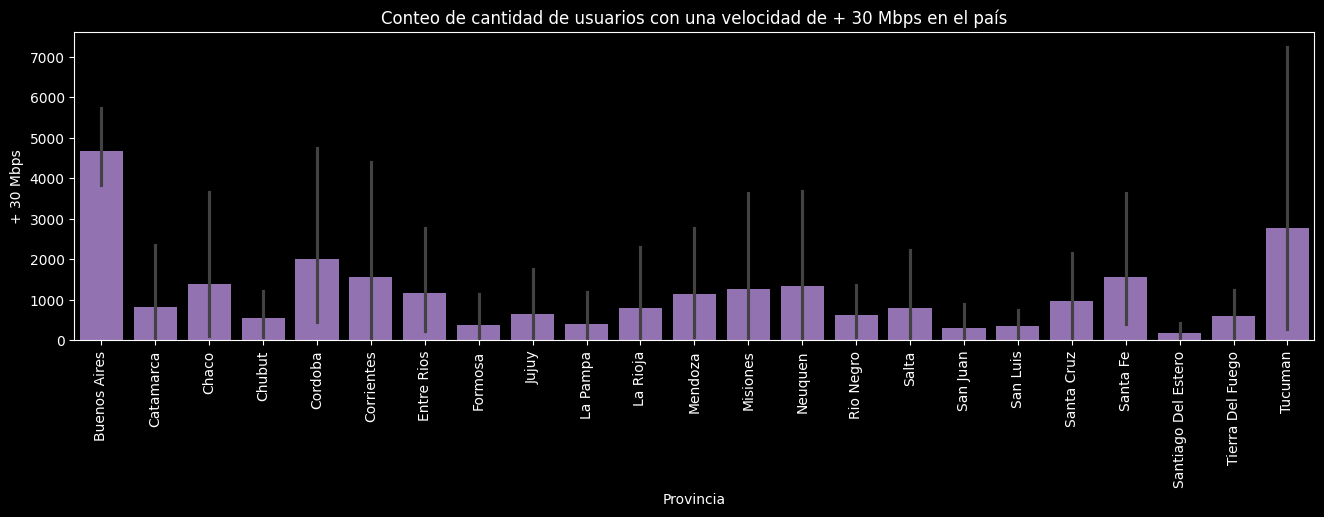

In [114]:
columnas = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']
for i in columnas:
    plt.figure(figsize=(16, 4))
    sns.barplot(x='Provincia', y= i, data=P_P_L[P_P_L['Provincia'] != 'Caba'], color='tab:purple')
    plt.ylabel(f'{i}')
    plt.xlabel('Provincia')
    plt.xticks(rotation=90)
    plt.title(f'Conteo de cantidad de usuarios con una velocidad de {i} en el país')
    plt.show()

> Con estas gráficas se pueden ver los distintos comportamientos de las provincias y que tanto varía en la provincia (por ejemplo la variabilidad de Tierra del Fuego siempre es muy grande), esto da pie a varios análisis de los puntos geográficos con menos conexiones que se harán en la herramienta BI.

> Por otra parte los valores que muestra Tierra del Fuego son para estudiar, ya que muchas veces muestra cantidades incluso superiores a Buenos Aires, lo que no pareciera tener relación con la cantidad de población real que tienen esta provincia.

In [115]:
P_P_L[P_P_L['Provincia']== 'Tierra Del Fuego']

Provincia              Partido         Localidad Link Indec  \
2970  Tierra Del Fuego           Río Grande        Río Grande   94007010   
2971  Tierra Del Fuego           Río Grande           Tolhuin   94007020   
2972  Tierra Del Fuego              Ushuaia  Laguna Escondida   94014010   
2973  Tierra Del Fuego              Ushuaia           Ushuaia   94014020   
2974  Tierra Del Fuego  Antartida Argentina      Base Orcadas  Sin Datos   
2975  Tierra Del Fuego  Antartida Argentina  Base Belgrano Ii  Sin Datos   
2976  Tierra Del Fuego  Antartida Argentina   Base San Martin  Sin Datos   

      ADSL  Cablemodem  Dail Up  Fibra Optica  Otros1  Satelital  ...  \
2970  6225       23991      135          2435       1         13  ...   
2971   251           0        0             2       0          3  ...   
2972     0           0        0             0       0          1  ...   
2973  2881       24080      170          1243       3          5  ...   
2974     0           0        0             0       0          1  ...   
2975     0           0        0             1       0          0  ...   
2976     0           0        0             1       0          0  ...   

      Wireless  Total general   Otros  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
2970         3          32803  5137.0            17.0                712.0   
2971        45            301     NaN             1.0                 11.0   
2972         0              1     NaN             1.0                  0.0   
2973       109          28491  2738.0             3.0                111.0   
2974         0              1     NaN             0.0                  0.0   
2975         0              1     NaN             0.0                  0.0   
2976         0              1     NaN             0.0                  0.0   

      + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
2970             4544.0             10467.0               5902.0   
2971               20.0                71.0                234.0   
2972                0.0                 0.0                  0.0   
2973             1489.0              6308.0              13184.0   
2974                0.0                 0.0                  0.0   
2975                0.0                 1.0                  0.0   
2976                0.0                 1.0                  0.0   

      + 20 Mbps - 30 Mbps  + 30 Mbps  
2970               3598.0     2243.0  
2971                  2.0        0.0  
2972                  0.0        0.0  
2973               2736.0     2063.0  
2974                  0.0        1.0  
2975                  0.0        0.0  
2976                  0.0        0.0  

[7 rows x 21 columns]

In [116]:
P_P_L[P_P_L['Provincia']== 'Tierra Del Fuego'].describe().T

count         mean           std     min      25%  \
ADSL                   7.0  1336.714286   2401.601946     0.0     0.00   
Cablemodem             7.0  6867.285714  11728.151243     0.0     0.00   
Dail Up                7.0    43.571429     75.095178     0.0     0.00   
Fibra Optica           7.0   526.000000    960.689683     0.0     0.50   
Otros1                 7.0     0.571429      1.133893     0.0     0.00   
Satelital              7.0     3.285714      4.644505     0.0     0.50   
Wimax                  7.0     0.000000      0.000000     0.0     0.00   
Wireless               7.0    22.428571     41.620737     0.0     0.00   
Total general          7.0  8799.857143  14976.660146     1.0     1.00   
Otros                  2.0  3937.500000   1696.349168  2738.0  3337.75   
HASTA 512 kbps         7.0     3.142857      6.202918     0.0     0.00   
+ 512 Kbps - 1 Mbps    7.0   119.142857    264.581700     0.0     0.00   
+ 1 Mbps - 6 Mbps      7.0   864.714286   1714.221953     0.0     0.00   
+ 6 Mbps - 10 Mbps     7.0  2406.857143   4258.389110     0.0     0.50   
+ 10 Mbps - 20 Mbps    7.0  2760.000000   5088.926147     0.0     0.00   
+ 20 Mbps - 30 Mbps    7.0   905.142857   1565.051589     0.0     0.00   
+ 30 Mbps              7.0   615.285714   1051.743269     0.0     0.00   

                        50%       75%      max  
ADSL                    0.0   1566.00   6225.0  
Cablemodem              0.0  11995.50  24080.0  
Dail Up                 0.0     67.50    170.0  
Fibra Optica            1.0    622.50   2435.0  
Otros1                  0.0      0.50      3.0  
Satelital               1.0      4.00     13.0  
Wimax                   0.0      0.00      0.0  
Wireless                0.0     24.00    109.0  
Total general           1.0  14396.00  32803.0  
Otros                3937.5   4537.25   5137.0  
HASTA 512 kbps          1.0      2.00     17.0  
+ 512 Kbps - 1 Mbps     0.0     61.00    712.0  
+ 1 Mbps - 6 Mbps       0.0    754.50   4544.0  
+ 6 Mbps - 10 Mbps      1.0   3189.50  10467.0  
+ 10 Mbps - 20 Mbps     0.0   3068.00  13184.0  
+ 20 Mbps - 30 Mbps     0.0   1369.00   3598.0  
+ 30 Mbps               0.0   1032.00   2243.0

> Después de ver los valores de la tabla anterior, se puede concluir que las gráficas inusuales de Tierra del Fuego solo son causadas porque se tiene muy pocos lugares de donde salen los datos, entonces al promediar el número final es relativamente grande. Hasta se podría pensar en eliminar la Antártida Argentina por no ser un lugar comercialmente relevante, pero este análisis se hará en una etapa posterior.

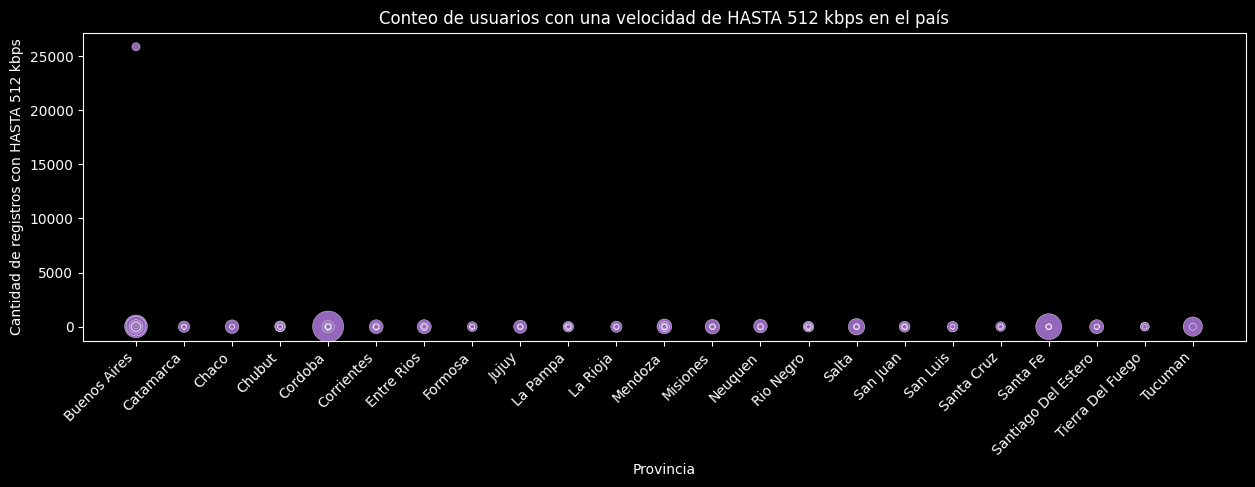

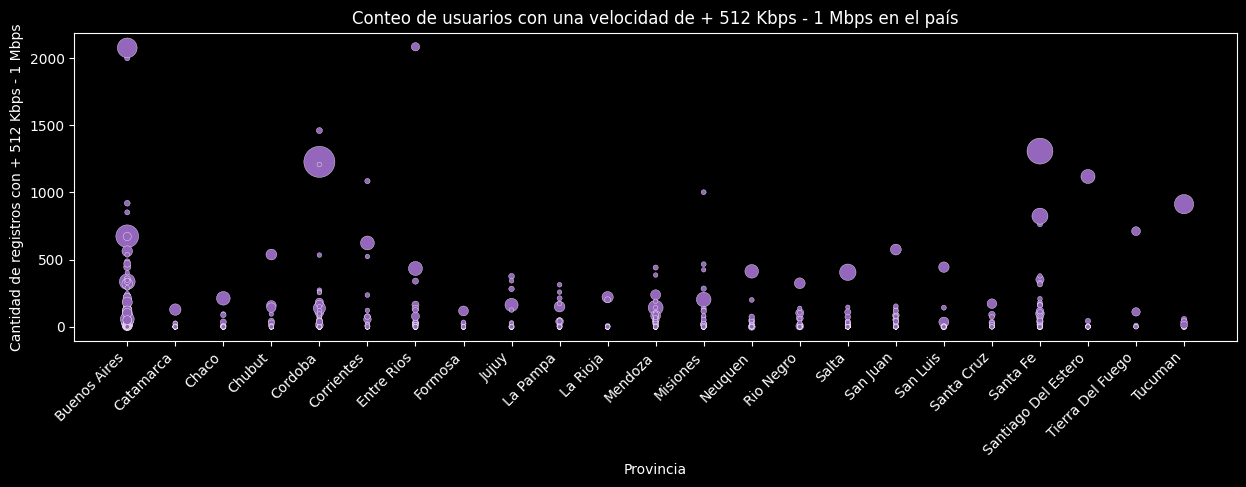

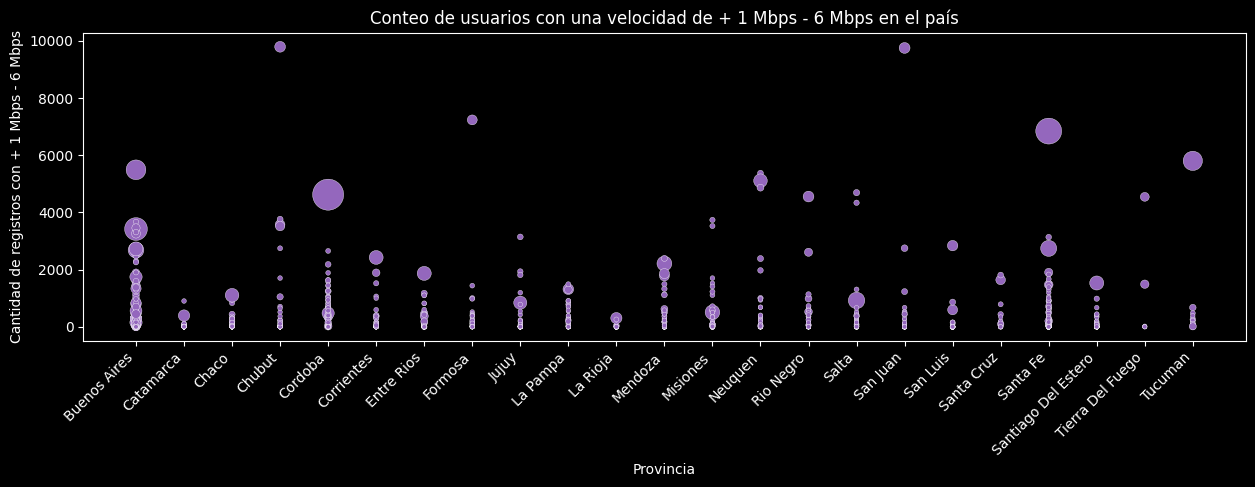

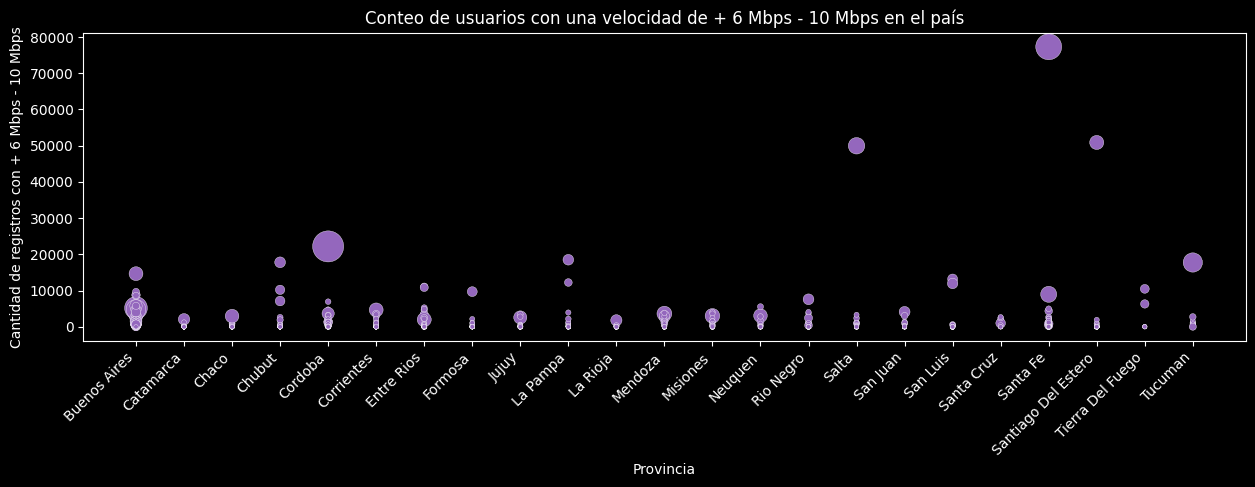

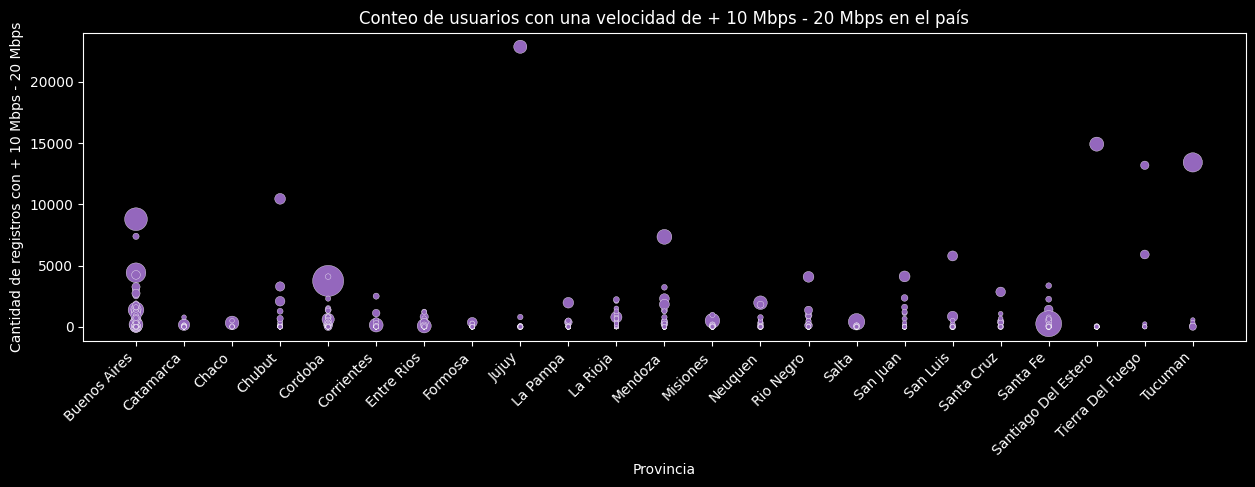

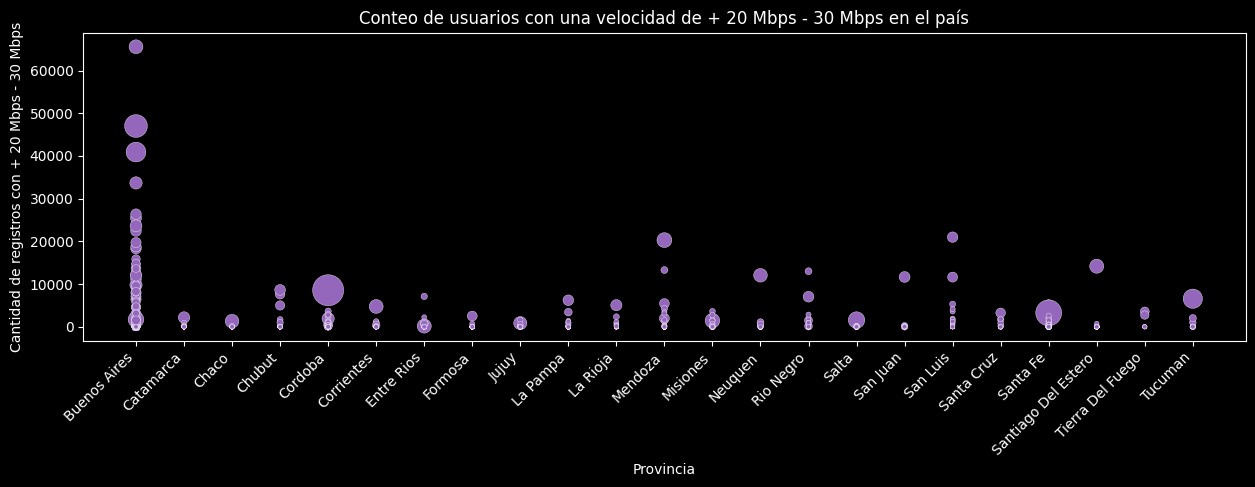

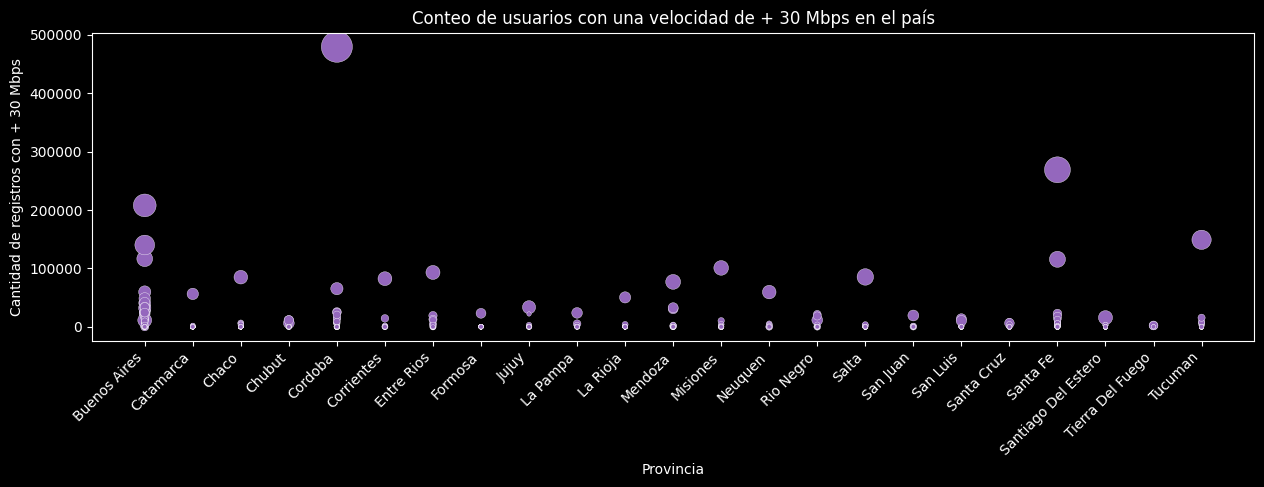

In [117]:
columnas = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']
for i in columnas:
    plt.figure(figsize=(15, 4))
    sns.scatterplot(data=P_P_L[P_P_L['Provincia']!= 'Caba'], x='Provincia', y=i, size='Total general', legend=False, sizes=(10, 500), color='tab:purple')
    plt.ylabel(f'Cantidad de registros con {i}')
    plt.xlabel('Provincia')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Conteo de usuarios con una velocidad de {i} en el país')
    plt.show()

> En la gráfica, cada burbuja es una localidad de la provincia, y sus tamaños dependen del total de la población registrada y la altura de la cantidad de población dentro de cierto rango de velocidad. Por ejemplo Buenos Aires tiene la localidad con mayor cantidad de registros con menos de 512 Mbps (que a su vez es una localidad con relativamente pocos registros) o que en Jujuy esta la localidad yon mayor cantidad de registros en el rango de 10 a 20 Mbps.
A nivel mercado, un dato importante podria ser que en Santa Fe, su mayor localidad tiene la mayor cantidad de registros entre 6 y 10 Mbps, por lo que se podria pensar que hay mucho margen de crecimiento.

## Ganancia

### Información general

In [118]:
ganancia.describe().T

count          mean           std           min  \
Año                           40.0  2.018500e+03  2.908872e+00  2.014000e+03   
Trimestre                     40.0  2.500000e+00  1.132277e+00  1.000000e+00   
Ingresos (miles de pesos)     40.0  3.281153e+09  3.850304e+09  2.984054e+08   
Ingresos (miles de dolares)   40.0  4.915390e+07  7.221311e+06  3.787961e+07   

                                      25%           50%           75%  \
Año                          2.016000e+03  2.018500e+03  2.021000e+03   
Trimestre                    1.750000e+00  2.500000e+00  3.250000e+00   
Ingresos (miles de pesos)    6.817891e+08  1.842255e+09  3.942974e+09   
Ingresos (miles de dolares)  4.380453e+07  4.796150e+07  5.311604e+07   

                                      max  
Año                          2.023000e+03  
Trimestre                    4.000000e+00  
Ingresos (miles de pesos)    1.673760e+10  
Ingresos (miles de dolares)  6.769911e+07

### Valores faltantes

<Axes: >

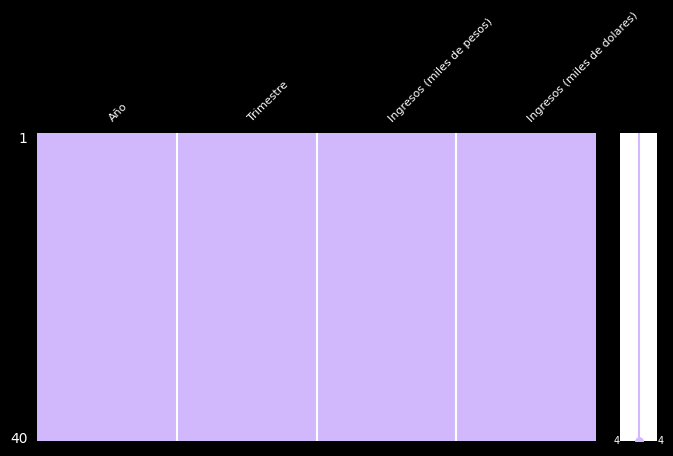

In [119]:
msno.matrix(ganancia, figsize=(8, 4), color=(0.823, 0.722, 0.992), fontsize=8)

### Duplicados

In [120]:
ganancia[ganancia.duplicated()]

Empty DataFrame
Columns: [Año, Trimestre, Ingresos (miles de pesos), Ingresos (miles de dolares)]
Index: []

### Variables numéricas

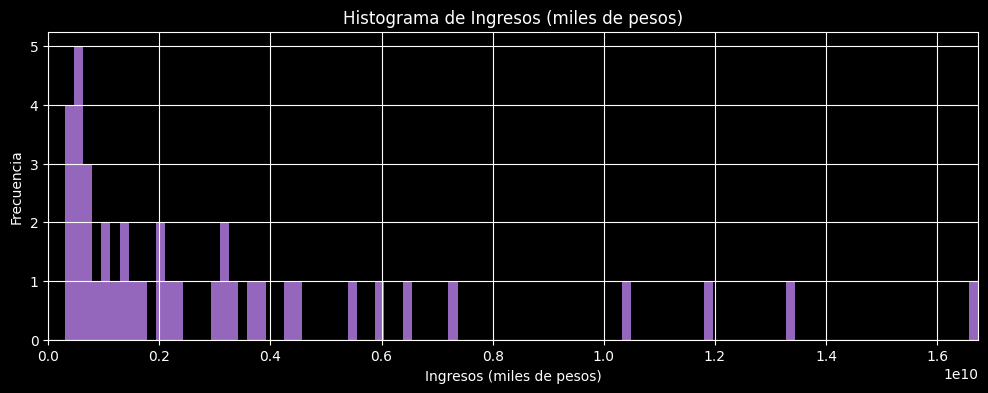

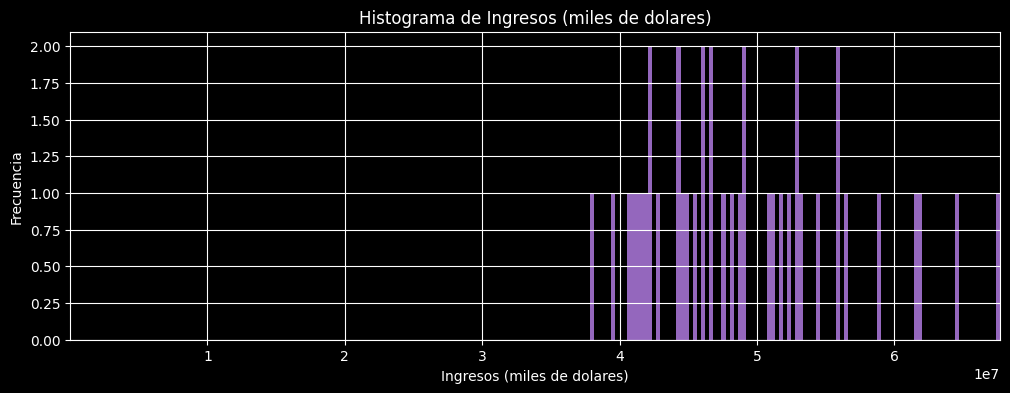

In [121]:
columnas = ['Ingresos (miles de pesos)', 'Ingresos (miles de dolares)']

for i in columnas:
    plt.figure(figsize=(12,4))
    ganancia[i].hist(bins=100,color='tab:purple')
    plt.xlim(1, ganancia[i].max())
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()

> Se puede ver como al dividir la ganancia por el valor del dolar se achica mucho la el rango de valores

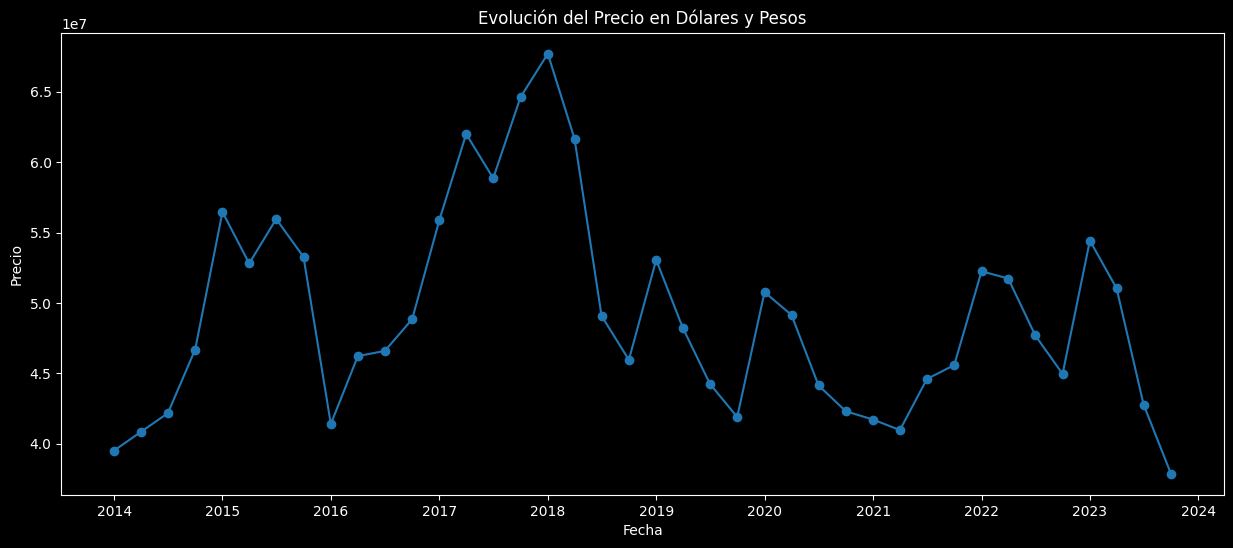

In [122]:
ganancia['Fecha'] = pd.to_datetime(ganancia['Año'].astype(str) + 'Q' + ganancia['Trimestre'].astype(str))
plt.figure(figsize=(15, 6))
plt.plot(ganancia['Fecha'], ganancia['Ingresos (miles de dolares)'], label='Precio en Dólares',color='tab:blue' , marker='o')
plt.title('Evolución del Precio en Dólares y Pesos')
plt.xlabel('Fecha')
plt.ylabel('Precio')

plt.show()

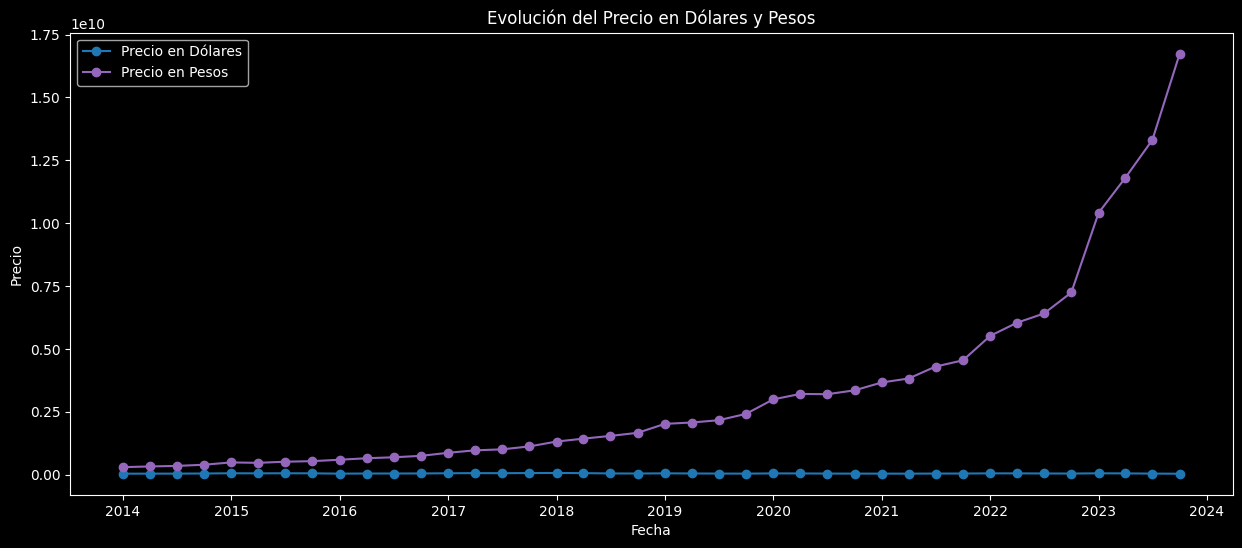

In [123]:
ganancia['Fecha'] = pd.to_datetime(ganancia['Año'].astype(str) + 'Q' + ganancia['Trimestre'].astype(str))

plt.figure(figsize=(15, 6))
plt.plot(ganancia['Fecha'], ganancia['Ingresos (miles de dolares)'], label='Precio en Dólares',color='tab:blue', marker='o')
plt.plot(ganancia['Fecha'], ganancia['Ingresos (miles de pesos)'], label='Precio en Pesos',color='tab:purple',  marker='o')

plt.title('Evolución del Precio en Dólares y Pesos')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


> Como era de esperarse, el valor del dólar cambia mucho la perspectiva de las ganancias, cuando se aplica el cambio se puede ver como la mejor época fue en 2018 pero en general las ganancias se mantienen en los mismos rangos, ni crecen ni decrecen.

# Descarga de tablas

In [124]:
A_T_P.to_csv('ATP_df.csv', index=False)

In [125]:
P_P_L.to_csv('PPL_df.csv', index=False)

In [126]:
ganancia.to_csv('ganancia_df.csv', index=False)